In [1]:
#NITIN
#delhi technological university
#numpy and pandas used for numerical computation and data analysis
#matplotlib for creating data visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import random
import math
import time
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
#SVR will help us support create vector machines model
from sklearn.svm import SVR
#mean_squared_error and mean_absolute_error will used for the accuracy of the model
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime
import operator
plt.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
confirmed_cases = pd.read_csv("2confirmed.csv")

In [3]:
confirmed_cases.head()

,State / UT,14-Mar-20,15-Mar-20,16-Mar-20,17-Mar-20,18-Mar-20,19-Mar-20,20-Mar-20,21-Mar-20,22-Mar-20,...,18-May-20,19-May-20,20-May-20,21-May-20,22-May-20,23-May-20,24-May-20,25-May-20,26-May-20,27-May-20
0,AN,0,0,0,0,0,0,0,0,0,...,33,33,33,33,33,33,33,33,33,33
1,AP,1,1,1,1,1,3,3,5,6,...,2432,2489,2560,2605,2667,2714,2780,2886,2983,3117
2,AR,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,2,2,2,2
3,AS,0,0,0,0,0,0,0,0,0,...,116,158,189,211,226,347,393,549,683,784
4,BR,0,0,0,0,0,0,0,0,2,...,1423,1519,1776,1987,2166,2394,2574,2737,2968,3036


In [4]:
deaths_reported = pd.read_csv("2deceased.csv")

In [5]:
deaths_reported.head()

,State/UT,14-Mar-20,15-Mar-20,16-Mar-20,17-Mar-20,18-Mar-20,19-Mar-20,20-Mar-20,21-Mar-20,22-Mar-20,...,18-May-20,19-May-20,20-May-20,21-May-20,22-May-20,23-May-20,24-May-20,25-May-20,26-May-20,27-May-20
0,AN,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,AP,0,0,0,0,0,0,0,0,0,...,50,52,53,54,55,56,56,56,57,58
2,AR,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,AS,0,0,0,0,0,0,0,0,0,...,5,5,5,5,5,5,5,5,5,5
4,BR,0,0,0,0,0,0,0,0,1,...,9,9,9,9,11,11,11,13,14,15


In [6]:
recovered_cases = pd.read_csv("2recovered.csv")

In [7]:
recovered_cases.head()

,State/UT,14-Mar-20,15-Mar-20,16-Mar-20,17-Mar-20,18-Mar-20,19-Mar-20,20-Mar-20,21-Mar-20,22-Mar-20,...,18-May-20,19-May-20,20-May-20,21-May-20,22-May-20,23-May-20,24-May-20,25-May-20,26-May-20,27-May-20
0,AN,0,0,0,0,0,0,0,0,0,...,33,33,33,33,33,33,33,33,33,33
1,AP,0,0,0,0,0,0,0,0,0,...,1552,1621,1664,1705,1731,1779,1841,1892,2017,2065
2,AR,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
3,AS,0,0,0,0,0,0,0,0,0,...,42,42,49,55,55,57,58,63,63,88
4,BR,0,0,0,0,0,0,0,0,0,...,517,517,571,571,629,653,702,733,800,918


In [8]:
total_mergedata = pd.read_csv("clean_complete.csv")

c:\users\91965\appdata\local\programs\python\python38-32\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [9]:
total_mergedata.head()

,DATE,Confirmed,Recovered,Deaths
0,14-Mar-20,81.0,9.0,2.0
1,15-Mar-20,108.0,13.0,2.0
2,16-Mar-20,123.0,14.0,2.0
3,17-Mar-20,134.0,15.0,2.0
4,18-Mar-20,171.0,15.0,3.0


In [10]:
final_data = pd.read_csv('latestdata.csv')

In [11]:
final_data.head()

,State/UT,confirmed,recovered,death
0,AN,33,33,0
1,AP,3117,2065,58
2,AR,2,1,0
3,AS,784,88,5
4,BR,3036,918,15


In [12]:
#fetching all the columns names from confirmed cases datasets
#.keys() function is used to fetch the columns
cols = confirmed_cases.keys()
cols

Index(['State / UT', '14-Mar-20', '15-Mar-20', '16-Mar-20', '17-Mar-20',
       '18-Mar-20', '19-Mar-20', '20-Mar-20', '21-Mar-20', '22-Mar-20',
       '23-Mar-20', '24-Mar-20', '25-Mar-20', '26-Mar-20', '27-Mar-20',
       '28-Mar-20', '29-Mar-20', '30-Mar-20', '31-Mar-20', '01-Apr-20',
       '02-Apr-20', '03-Apr-20', '04-Apr-20', '05-Apr-20', '06-Apr-20',
       '07-Apr-20', '08-Apr-20', '09-Apr-20', '10-Apr-20', '11-Apr-20',
       '12-Apr-20', '13-Apr-20', '14-Apr-20', '15-Apr-20', '16-Apr-20',
       '17-Apr-20', '18-Apr-20', '19-Apr-20', '20-Apr-20', '21-Apr-20',
       '22-Apr-20', '23-Apr-20', '24-Apr-20', '25-Apr-20', '26-Apr-20',
       '27-Apr-20', '28-Apr-20', '29-Apr-20', '30-Apr-20', '01-May-20',
       '02-May-20', '03-May-20', '04-May-20', '05-May-20', '06-May-20',
       '07-May-20', '08-May-20', '09-May-20', '10-May-20', '11-May-20',
       '12-May-20', '13-May-20', '14-May-20', '15-May-20', '16-May-20',
       '17-May-20', '18-May-20', '19-May-20', '20-May-20', '21-

In [13]:
confirmed  = confirmed_cases.loc[:,cols[1]:cols[-1]]
deaths = deaths_reported.loc[:,cols[1]:cols[-1]]
recovered = recovered_cases.loc[:,cols[1]:cols[-1]]


In [14]:
confirmed

,14-Mar-20,15-Mar-20,16-Mar-20,17-Mar-20,18-Mar-20,19-Mar-20,20-Mar-20,21-Mar-20,22-Mar-20,23-Mar-20,...,18-May-20,19-May-20,20-May-20,21-May-20,22-May-20,23-May-20,24-May-20,25-May-20,26-May-20,27-May-20
0,0,0,0,0,0,0,0,0,0,0,...,33,33,33,33,33,33,33,33,33,33
1,1,1,1,1,1,3,3,5,6,7,...,2432,2489,2560,2605,2667,2714,2780,2886,2983,3117
2,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,2,2,2,2
3,0,0,0,0,0,0,0,0,0,0,...,116,158,189,211,226,347,393,549,683,784
4,0,0,0,0,0,0,0,0,2,3,...,1423,1519,1776,1987,2166,2394,2574,2737,2968,3036
5,0,0,0,0,0,1,5,5,6,7,...,196,199,202,218,219,225,262,266,278,279
6,0,0,0,0,0,1,1,1,1,1,...,95,100,114,128,172,214,252,292,360,364
7,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,2,2,2,2,2
8,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,2,2,2,2,2
9,7,7,7,8,10,14,20,27,27,30,...,10054,10554,11088,11659,12319,12910,13418,14053,14465,15257


In [15]:
deaths

,14-Mar-20,15-Mar-20,16-Mar-20,17-Mar-20,18-Mar-20,19-Mar-20,20-Mar-20,21-Mar-20,22-Mar-20,23-Mar-20,...,18-May-20,19-May-20,20-May-20,21-May-20,22-May-20,23-May-20,24-May-20,25-May-20,26-May-20,27-May-20
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,50,52,53,54,55,56,56,56,57,58
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,5,5,5,5,5,5,5,5,5,5
4,0,0,0,0,0,0,0,0,1,1,...,9,9,9,9,11,11,11,13,14,15
5,0,0,0,0,0,0,0,0,0,0,...,3,3,3,3,3,3,4,4,4,4
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1,1,1,1,1,1,1,1,1,1,...,160,166,176,194,208,231,261,276,288,303


In [16]:
dates = confirmed.keys()
india_cases = []
total_deaths = []
mortality_rate = []
recovery_rate = []
total_recovered = []
total_active = []

#cases in each state and UT
AndamanandNicobar_cases = []
Andrapradesh_cases = []
Arunachalpradesh_cases = []
Assam_cases = []
Bihar_cases = []
Chandigarh_cases = []
Chhattisgarh_cases = []
Delhi_cases = []
Dadra_cases = []
Daman_cases = []
Goa_cases = []
Gujarat_cases = []
Haryana_cases = []
Himachalpradesh_cases = []
Jammuandkashmir_cases = []
jharkhand_cases = []
Karnataka_cases = []
kerala_cases = []
ladakh_cases = []
lakshadweep_cases = []
Madhyapradesh_cases = []
Maharastra_cases = []
Manipur_cases = []
Meghalaya_cases = []
Mizoram_cases = []
Nagaland_cases = []
Odisha_cases = []
Puducherry_cases = []
punjab_cases = []
Rajasthan_cases = []
Sikkim_cases = []
Tamilnadu_cases = []
Telangana_cases = []
Tripura_cases = []
Uttarpradesh_cases = []
Uttarakhand_cases = []
Westbangal_cases = []

#deaths in each state and UT
AndamanandNicobar_deaths = []
Andrapradesh_deaths = []
Arunachalpradesh_deaths = []
Assam_deaths = []
Bihar_deaths = []
Chandigarh_deaths = []
Chhattisgarh_deaths = []
Delhi_deaths = []
Dadra_deaths = []
Daman_deaths = []
Goa_deaths = []
Gujarat_deaths = []
Haryana_deaths = []
Himachalpradesh_deaths = []
Jammuandkashmir_deaths = []
jharkhand_deaths = []
Karnataka_deaths = []
kerala_deaths = []
ladakh_deaths = []
lakshadweep_deaths = []
Madhyapradesh_deaths = []
Maharastra_deaths = []
Manipur_deaths = []
Meghalaya_deaths = []
Mizoram_deaths = []
Nagaland_deaths = []
Odisha_deaths = []
Puducherry_deaths = []
punjab_deaths = []
Rajasthan_deaths = []
Sikkim_deaths = []
Tamilnadu_deaths = []
Telangana_deaths = []
Tripura_deaths = []
Uttarpradesh_deaths = []
Uttarakhand_deaths = []
Westbangal_deaths = []

#recoveries in each state and UT
AndamanandNicobar_recoveries = []
Andrapradesh_recoveries = []
Arunachalpradesh_recoveries = []
Assam_recoveries = []
Bihar_recoveries = []
Chandigarh_recoveries = []
Chhattisgarh_recoveries = []
Delhi_recoveries = []
Dadra_recoveries = []
Daman_recoveries = []
Goa_recoveries = []
Gujarat_recoveries = []
Haryana_recoveries = []
Himachalpradesh_recoveries = []
Jammuandkashmir_recoveries = []
jharkhand_recoveries = []
Karnataka_recoveries = []
kerala_recoveries = []
ladakh_recoveries = []
lakshadweep_recoveries = []
Madhyapradesh_recoveries = []
Maharastra_recoveries = []
Manipur_recoveries = []
Meghalaya_recoveries = []
Mizoram_recoveries = []
Nagaland_recoveries = []
Odisha_recoveries = []
Puducherry_recoveries = []
punjab_recoveries = []
Rajasthan_recoveries = []
Sikkim_recoveries = []
Tamilnadu_recoveries = []
Telangana_recoveries = []
Tripura_recoveries = []
Uttarpradesh_recoveries = []
Uttarakhand_recoveries = []
Westbangal_recoveries = []

In [17]:
for i in dates:
    confirmed_sum = confirmed[i].sum()
    death_sum = deaths[i].sum()
    recovered_sum = recovered[i].sum()
    
    india_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    total_recovered.append(recovered_sum)
    total_active.append(confirmed_sum-death_sum-recovered_sum)

    mortality_rate.append(death_sum/confirmed_sum)
    recovery_rate.append(recovered_sum/confirmed_sum)

    AndamanandNicobar_cases.append(confirmed_cases[confirmed_cases['State / UT']=='AN'][i].sum())
    Andrapradesh_cases.append(confirmed_cases[confirmed_cases['State / UT']=='AP'][i].sum())
    Arunachalpradesh_cases.append(confirmed_cases[confirmed_cases['State / UT']=='AR'][i].sum())
    Assam_cases.append(confirmed_cases[confirmed_cases['State / UT']=='AS'][i].sum())
    Bihar_cases.append(confirmed_cases[confirmed_cases['State / UT']=='BR'][i].sum())
    Chandigarh_cases.append(confirmed_cases[confirmed_cases['State / UT']=='CH'][i].sum())
    Chhattisgarh_cases.append(confirmed_cases[confirmed_cases['State / UT']=='CT'][i].sum())
    Delhi_cases.append(confirmed_cases[confirmed_cases['State / UT']=='DL'][i].sum())
    Dadra_cases.append(confirmed_cases[confirmed_cases['State / UT']=='DN'][i].sum())
    Daman_cases.append(confirmed_cases[confirmed_cases['State / UT']=='DD'][i].sum())
    Goa_cases.append(confirmed_cases[confirmed_cases['State / UT']=='GA'][i].sum())
    Gujarat_cases.append(confirmed_cases[confirmed_cases['State / UT']=='GJ'][i].sum())
    Haryana_cases.append(confirmed_cases[confirmed_cases['State / UT']=='HR'][i].sum())
    Himachalpradesh_cases.append(confirmed_cases[confirmed_cases['State / UT']=='HP'][i].sum())
    Jammuandkashmir_cases.append(confirmed_cases[confirmed_cases['State / UT']=='JK'][i].sum())
    jharkhand_cases.append(confirmed_cases[confirmed_cases['State / UT']=='JH'][i].sum())
    Karnataka_cases.append(confirmed_cases[confirmed_cases['State / UT']=='KA'][i].sum())
    kerala_cases.append(confirmed_cases[confirmed_cases['State / UT']=='KL'][i].sum())
    ladakh_cases.append(confirmed_cases[confirmed_cases['State / UT']=='LA'][i].sum())
    lakshadweep_cases.append(confirmed_cases[confirmed_cases['State / UT']=='LD'][i].sum())
    Madhyapradesh_cases.append(confirmed_cases[confirmed_cases['State / UT']=='MP'][i].sum())
    Maharastra_cases.append(confirmed_cases[confirmed_cases['State / UT']=='MH'][i].sum())
    Manipur_cases.append(confirmed_cases[confirmed_cases['State / UT']=='MN'][i].sum())
    Meghalaya_cases.append(confirmed_cases[confirmed_cases['State / UT']=='ML'][i].sum())
    Mizoram_cases.append(confirmed_cases[confirmed_cases['State / UT']=='MZ'][i].sum())
    Nagaland_cases.append(confirmed_cases[confirmed_cases['State / UT']=='NL'][i].sum())
    Odisha_cases.append(confirmed_cases[confirmed_cases['State / UT']=='OR'][i].sum())
    Puducherry_cases.append(confirmed_cases[confirmed_cases['State / UT']=='PY'][i].sum())
    punjab_cases.append(confirmed_cases[confirmed_cases['State / UT']=='PB'][i].sum())
    Rajasthan_cases.append(confirmed_cases[confirmed_cases['State / UT']=='RJ'][i].sum())
    Sikkim_cases.append(confirmed_cases[confirmed_cases['State / UT']=='SK'][i].sum())
    Tamilnadu_cases.append(confirmed_cases[confirmed_cases['State / UT']=='TN'][i].sum())
    Telangana_cases.append(confirmed_cases[confirmed_cases['State / UT']=='TG'][i].sum())
    Tripura_cases.append(confirmed_cases[confirmed_cases['State / UT']=='TR'][i].sum())
    Uttarpradesh_cases.append(confirmed_cases[confirmed_cases['State / UT']=='UP'][i].sum())
    Uttarakhand_cases.append(confirmed_cases[confirmed_cases['State / UT']=='UK'][i].sum())
    Westbangal_cases.append(confirmed_cases[confirmed_cases['State / UT']=='WB'][i].sum())


    AndamanandNicobar_deaths.append(deaths_reported[deaths_reported['State/UT']== 'AN'][i].sum())
    Andrapradesh_deaths.append(deaths_reported[deaths_reported['State/UT']== 'AP'][i].sum())
    Arunachalpradesh_deaths.append(deaths_reported[deaths_reported['State/UT']== 'AR'][i].sum())
    Assam_deaths.append(deaths_reported[deaths_reported['State/UT']== 'AS'][i].sum())
    Bihar_deaths.append(deaths_reported[deaths_reported['State/UT']== 'BR'][i].sum())
    Chandigarh_deaths.append(deaths_reported[deaths_reported['State/UT']== 'CH'][i].sum())
    Chhattisgarh_deaths.append(deaths_reported[deaths_reported['State/UT']== 'CT'][i].sum())
    Delhi_deaths.append(deaths_reported[deaths_reported['State/UT']== 'DL'][i].sum())
    Dadra_deaths.append(deaths_reported[deaths_reported['State/UT']== 'DN'][i].sum())
    Daman_deaths.append(deaths_reported[deaths_reported['State/UT']== 'DD'][i].sum())
    Goa_deaths.append(deaths_reported[deaths_reported['State/UT']== 'GA'][i].sum())
    Gujarat_deaths.append(deaths_reported[deaths_reported['State/UT']== 'GJ'][i].sum())
    Haryana_deaths.append(deaths_reported[deaths_reported['State/UT']== 'HR'][i].sum())
    Himachalpradesh_deaths.append(deaths_reported[deaths_reported['State/UT']== 'HP'][i].sum())
    Jammuandkashmir_deaths.append(deaths_reported[deaths_reported['State/UT']== 'JK'][i].sum())
    jharkhand_deaths.append(deaths_reported[deaths_reported['State/UT']== 'JH'][i].sum())
    Karnataka_deaths.append(deaths_reported[deaths_reported['State/UT']== 'KA'][i].sum())
    kerala_deaths.append(deaths_reported[deaths_reported['State/UT']== 'KL'][i].sum())
    ladakh_deaths.append(deaths_reported[deaths_reported['State/UT']== 'LA'][i].sum())
    lakshadweep_deaths.append(deaths_reported[deaths_reported['State/UT']== 'LD'][i].sum())
    Madhyapradesh_deaths.append(deaths_reported[deaths_reported['State/UT']== 'MP'][i].sum())
    Maharastra_deaths.append(deaths_reported[deaths_reported['State/UT']== 'MH'][i].sum())
    Manipur_deaths.append(deaths_reported[deaths_reported['State/UT']== 'MN'][i].sum())
    Meghalaya_deaths.append(deaths_reported[deaths_reported['State/UT']== 'ML'][i].sum())
    Mizoram_deaths.append(deaths_reported[deaths_reported['State/UT']== 'MZ'][i].sum())
    Nagaland_deaths.append(deaths_reported[deaths_reported['State/UT']== 'NL'][i].sum())
    Odisha_deaths.append(deaths_reported[deaths_reported['State/UT']== 'OR'][i].sum())
    Puducherry_deaths.append(deaths_reported[deaths_reported['State/UT']== 'PY'][i].sum())
    punjab_deaths.append(deaths_reported[deaths_reported['State/UT']== 'PB'][i].sum())
    Rajasthan_deaths.append(deaths_reported[deaths_reported['State/UT']== 'RJ'][i].sum())
    Sikkim_deaths.append(deaths_reported[deaths_reported['State/UT']== 'SK'][i].sum())
    Tamilnadu_deaths.append(deaths_reported[deaths_reported['State/UT']== 'TN'][i].sum())
    Telangana_deaths.append(deaths_reported[deaths_reported['State/UT']== 'TG'][i].sum())
    Tripura_deaths.append(deaths_reported[deaths_reported['State/UT']== 'TR'][i].sum())
    Uttarpradesh_deaths.append(deaths_reported[deaths_reported['State/UT']== 'UP'][i].sum())
    Uttarakhand_deaths.append(deaths_reported[deaths_reported['State/UT']== 'UK'][i].sum())
    Westbangal_deaths.append(deaths_reported[deaths_reported['State/UT']== 'WB'][i].sum())

    AndamanandNicobar_recoveries.append(recovered_cases[recovered_cases['State/UT']== 'AN'][i].sum())
    Andrapradesh_recoveries.append(recovered_cases[recovered_cases['State/UT']== 'AP'][i].sum())
    Arunachalpradesh_recoveries.append(recovered_cases[recovered_cases['State/UT']== 'AR'][i].sum())
    Assam_recoveries.append(recovered_cases[recovered_cases['State/UT']== 'AS'][i].sum())
    Bihar_recoveries.append(recovered_cases[recovered_cases['State/UT']== 'BR'][i].sum())
    Chandigarh_recoveries.append(recovered_cases[recovered_cases['State/UT']== 'CH'][i].sum())
    Chhattisgarh_recoveries.append(recovered_cases[recovered_cases['State/UT']== 'CT'][i].sum())
    Delhi_recoveries.append(recovered_cases[recovered_cases['State/UT']== 'DL'][i].sum())
    Dadra_recoveries.append(recovered_cases[recovered_cases['State/UT']== 'DN'][i].sum())
    Daman_recoveries.append(recovered_cases[recovered_cases['State/UT']== 'DD'][i].sum())
    Goa_recoveries.append(recovered_cases[recovered_cases['State/UT']== 'GA'][i].sum())
    Gujarat_recoveries.append(recovered_cases[recovered_cases['State/UT']== 'GJ'][i].sum())
    Haryana_recoveries.append(recovered_cases[recovered_cases['State/UT']== 'HR'][i].sum())
    Himachalpradesh_recoveries.append(recovered_cases[recovered_cases['State/UT']== 'HP'][i].sum())
    Jammuandkashmir_recoveries.append(recovered_cases[recovered_cases['State/UT']== 'JK'][i].sum())
    jharkhand_recoveries.append(recovered_cases[recovered_cases['State/UT']== 'JH'][i].sum())
    Karnataka_recoveries.append(recovered_cases[recovered_cases['State/UT']== 'KA'][i].sum())
    kerala_recoveries.append(recovered_cases[recovered_cases['State/UT']== 'KL'][i].sum())
    ladakh_recoveries.append(recovered_cases[recovered_cases['State/UT']== 'LA'][i].sum())
    lakshadweep_recoveries.append(recovered_cases[recovered_cases['State/UT']== 'LD'][i].sum())
    Madhyapradesh_recoveries.append(recovered_cases[recovered_cases['State/UT']== 'MP'][i].sum())
    Maharastra_recoveries.append(recovered_cases[recovered_cases['State/UT']== 'MH'][i].sum())
    Manipur_recoveries.append(recovered_cases[recovered_cases['State/UT']== 'MN'][i].sum())
    Meghalaya_recoveries.append(recovered_cases[recovered_cases['State/UT']== 'ML'][i].sum())
    Mizoram_recoveries.append(recovered_cases[recovered_cases['State/UT']== 'MZ'][i].sum())
    Nagaland_recoveries.append(recovered_cases[recovered_cases['State/UT']== 'NL'][i].sum())
    Odisha_recoveries.append(recovered_cases[recovered_cases['State/UT']== 'OR'][i].sum())
    Puducherry_recoveries.append(recovered_cases[recovered_cases['State/UT']== 'PY'][i].sum())
    punjab_recoveries.append(recovered_cases[recovered_cases['State/UT']== 'PB'][i].sum())
    Rajasthan_recoveries.append(recovered_cases[recovered_cases['State/UT']== 'RJ'][i].sum())
    Sikkim_recoveries.append(recovered_cases[recovered_cases['State/UT']== 'SK'][i].sum())
    Tamilnadu_recoveries.append(recovered_cases[recovered_cases['State/UT']== 'TN'][i].sum())
    Telangana_recoveries.append(recovered_cases[recovered_cases['State/UT']== 'TG'][i].sum())
    Tripura_recoveries.append(recovered_cases[recovered_cases['State/UT']== 'TR'][i].sum())
    Uttarpradesh_recoveries.append(recovered_cases[recovered_cases['State/UT']== 'UP'][i].sum())
    Uttarakhand_recoveries.append(recovered_cases[recovered_cases['State/UT']== 'UK'][i].sum())
    Westbangal_recoveries.append(recovered_cases[recovered_cases['State/UT']== 'WB'][i].sum())

In [18]:
recovered_sum

67749

In [19]:
confirmed_sum

154033

In [20]:
death_sum

4534

In [21]:
total_active

[70,
 93,
 107,
 116,
 153,
 174,
 229,
 307,
 371,
 459,
 516,
 601,
 654,
 789,
 918,
 1020,
 1145,
 1433,
 1832,
 2281,
 2789,
 3299,
 3843,
 4246,
 4717,
 5166,
 5863,
 6561,
 7188,
 7790,
 8894,
 9721,
 10436,
 11213,
 11824,
 12734,
 13888,
 14675,
 15456,
 16318,
 17303,
 18168,
 19517,
 20483,
 21413,
 22610,
 23554,
 24650,
 26007,
 27648,
 29549,
 32020,
 33569,
 35919,
 37684,
 39816,
 41461,
 43991,
 45923,
 47460,
 49086,
 51385,
 52855,
 53513,
 55873,
 57888,
 60048,
 62223,
 64660,
 67556,
 71222,
 74450,
 77394,
 79186,
 81750]

In [22]:
recovery_rate

[0.1111111111111111,
 0.12037037037037036,
 0.11382113821138211,
 0.11194029850746269,
 0.08771929824561403,
 0.10101010101010101,
 0.08984375,
 0.0688622754491018,
 0.057356608478802994,
 0.06958250497017893,
 0.0706713780918728,
 0.06564885496183206,
 0.06944444444444445,
 0.08597285067873303,
 0.0827653359298929,
 0.079155672823219,
 0.10498489425981873,
 0.09430496019595835,
 0.08264462809917356,
 0.07553107789142408,
 0.07414571244358478,
 0.07769627818527575,
 0.0766899766899767,
 0.0825303728529535,
 0.08771273611370863,
 0.09556833558863329,
 0.09442379182156134,
 0.10347551342812006,
 0.11502958579881657,
 0.11794092093831451,
 0.11463017893024591,
 0.11888172792196482,
 0.12200840879689522,
 0.13158090699233002,
 0.1421503727963208,
 0.15685027350209896,
 0.1649520286672061,
 0.17652769537781135,
 0.19802769200119533,
 0.2044922788956481,
 0.21756305074445456,
 0.2248312538351401,
 0.22595129375951295,
 0.23390827267185427,
 0.2411475131556612,
 0.24680294671046338,
 0.254945

In [23]:
india_cases

[81,
 108,
 123,
 134,
 171,
 198,
 256,
 334,
 401,
 503,
 566,
 655,
 720,
 884,
 1027,
 1137,
 1324,
 1633,
 2057,
 2542,
 3102,
 3681,
 4290,
 4774,
 5347,
 5912,
 6725,
 7596,
 8450,
 9208,
 10451,
 11482,
 12368,
 13429,
 14351,
 15722,
 17302,
 18541,
 20078,
 21370,
 23037,
 24445,
 26280,
 27887,
 29455,
 31357,
 33062,
 34863,
 37259,
 39823,
 42775,
 46431,
 49403,
 53005,
 56349,
 59689,
 62865,
 67176,
 70768,
 74330,
 78056,
 82046,
 85854,
 90644,
 95694,
 100322,
 105660,
 111082,
 116798,
 123116,
 129500,
 136169,
 142275,
 147810,
 154033]

In [24]:
mortality_rate

[0.024691358024691357,
 0.018518518518518517,
 0.016260162601626018,
 0.022388059701492536,
 0.017543859649122806,
 0.020202020202020204,
 0.015625,
 0.011976047904191617,
 0.017456359102244388,
 0.017892644135188866,
 0.0176678445229682,
 0.016793893129770993,
 0.022222222222222223,
 0.021493212669683258,
 0.023369036027263874,
 0.023746701846965697,
 0.030211480362537766,
 0.028169014084507043,
 0.026737967914438502,
 0.02714398111723053,
 0.02675693101225016,
 0.026079869600651995,
 0.027505827505827505,
 0.028068705488060328,
 0.030110342247989526,
 0.03061569688768606,
 0.0337546468401487,
 0.032780410742496054,
 0.03431952662721893,
 0.036055603822762815,
 0.03435077982968137,
 0.03448876502351507,
 0.03420116429495472,
 0.033435103135006326,
 0.03393491742735698,
 0.03320188271212314,
 0.032366200439255574,
 0.031983172428671595,
 0.032174519374439686,
 0.03191389798783341,
 0.031340886400138906,
 0.03194927388013909,
 0.03139269406392694,
 0.031591781116649335,
 0.0318791376676

In [25]:
total_deaths

[2,
 2,
 2,
 3,
 3,
 4,
 4,
 4,
 7,
 9,
 10,
 11,
 16,
 19,
 24,
 27,
 40,
 46,
 55,
 69,
 83,
 96,
 118,
 134,
 161,
 181,
 227,
 249,
 290,
 332,
 359,
 396,
 423,
 449,
 487,
 522,
 560,
 593,
 646,
 682,
 722,
 781,
 825,
 881,
 939,
 1008,
 1079,
 1154,
 1231,
 1323,
 1463,
 1566,
 1694,
 1785,
 1889,
 1986,
 2103,
 2215,
 2296,
 2416,
 2553,
 2650,
 2754,
 2874,
 3026,
 3157,
 3303,
 3437,
 3585,
 3727,
 3869,
 4025,
 4175,
 4347,
 4534]

In [26]:
total_recovered

[9,
 13,
 14,
 15,
 15,
 20,
 23,
 23,
 23,
 35,
 40,
 43,
 50,
 76,
 85,
 90,
 139,
 154,
 170,
 192,
 230,
 286,
 329,
 394,
 469,
 565,
 635,
 786,
 972,
 1086,
 1198,
 1365,
 1509,
 1767,
 2040,
 2466,
 2854,
 3273,
 3976,
 4370,
 5012,
 5496,
 5938,
 6523,
 7103,
 7739,
 8429,
 9059,
 10021,
 10852,
 11763,
 12845,
 14140,
 15301,
 16776,
 17887,
 19301,
 20970,
 22549,
 24454,
 26417,
 28011,
 30245,
 34257,
 36795,
 39277,
 42309,
 45422,
 48553,
 51833,
 54409,
 57694,
 60706,
 64277,
 67749]

In [27]:
Delhi_deaths

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 4,
 6,
 6,
 7,
 7,
 9,
 9,
 12,
 14,
 19,
 24,
 28,
 30,
 32,
 38,
 42,
 43,
 45,
 47,
 47,
 48,
 50,
 53,
 54,
 54,
 54,
 54,
 56,
 59,
 61,
 64,
 64,
 64,
 64,
 65,
 66,
 68,
 68,
 73,
 73,
 86,
 106,
 115,
 123,
 129,
 148,
 160,
 166,
 176,
 194,
 208,
 231,
 261,
 276,
 288,
 303]

In [28]:
Delhi_recoveries

[1,
 2,
 2,
 2,
 2,
 3,
 5,
 5,
 5,
 5,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 8,
 8,
 16,
 16,
 16,
 20,
 21,
 25,
 27,
 27,
 28,
 31,
 31,
 41,
 52,
 72,
 207,
 290,
 431,
 611,
 724,
 808,
 857,
 869,
 877,
 877,
 1078,
 1092,
 1094,
 1167,
 1256,
 1362,
 1431,
 1468,
 1542,
 1931,
 2020,
 2020,
 2069,
 2129,
 2512,
 2858,
 3045,
 3518,
 3926,
 4202,
 4485,
 4750,
 5192,
 5567,
 5897,
 6267,
 6540,
 6771,
 6954,
 7264]

In [29]:
Arunachalpradesh_recoveries

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

In [30]:
Goa_cases

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 3,
 3,
 3,
 5,
 5,
 5,
 5,
 5,
 6,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 15,
 15,
 20,
 29,
 38,
 46,
 50,
 52,
 54,
 55,
 66,
 67,
 67,
 68]

In [31]:
Goa_deaths

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [32]:
Goa_recoveries

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 5,
 5,
 5,
 5,
 6,
 6,
 6,
 6,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 16,
 16,
 16,
 19,
 28,
 37]

In [33]:
AndamanandNicobar_cases

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 6,
 9,
 9,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 12,
 14,
 15,
 16,
 17,
 18,
 22,
 29,
 33,
 33,
 33,
 33,
 33,
 33,
 33,
 33,
 33,
 33,
 33,
 33,
 33,
 33,
 33,
 33,
 33,
 33,
 33,
 33,
 33,
 33,
 33,
 33,
 33,
 33,
 33,
 33,
 33,
 33,
 33,
 33,
 33]

In [34]:
Assam_cases

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 16,
 16,
 23,
 26,
 26,
 26,
 28,
 28,
 29,
 29,
 29,
 30,
 32,
 33,
 33,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 36,
 36,
 36,
 36,
 36,
 38,
 38,
 43,
 43,
 43,
 43,
 43,
 45,
 46,
 54,
 60,
 62,
 63,
 65,
 65,
 80,
 87,
 90,
 93,
 101,
 116,
 158,
 189,
 211,
 226,
 347,
 393,
 549,
 683,
 784]

In [35]:
#its a user define function to track daily increases cases across the india,the daily casualities and daily recovery cases
def daily_increase(data):
    d = []
    for i in range(len(data)):
        if i == 0:
           d.append(data[0])
        else:
            d.append(data[i]-data[i-1])
    return d   

In [36]:
#daily confirmed cases
india_daily_increase = daily_increase(india_cases)
AndamanandNicobar_daily_increase = daily_increase(AndamanandNicobar_cases)
Andrapradesh_daily_increase = daily_increase(Andrapradesh_cases)
Arunachalpradesh_daily_increase = daily_increase(Arunachalpradesh_cases)
Assam_daily_increase = daily_increase(Assam_cases)
Bihar_daily_increase = daily_increase(Bihar_cases)
Chandigarh_daily_increase = daily_increase(Chandigarh_cases)
Chhattisgarh_daily_increase = daily_increase(Chhattisgarh_cases)
Delhi_daily_increase = daily_increase(Delhi_cases)
Dadra_daily_increase = daily_increase(Dadra_cases)
Daman_daily_increase = daily_increase(Daman_cases)
Goa_daily_increase = daily_increase(Goa_cases)
Gujarat_daily_increase = daily_increase(Gujarat_cases)
Haryana_daily_increase = daily_increase(Haryana_cases)
Himachalpradesh_daily_increase = daily_increase(Himachalpradesh_cases)
Jammuandkashmir_daily_increase = daily_increase(Jammuandkashmir_cases)
jharkhand_daily_increase = daily_increase(jharkhand_cases)
Karnataka_daily_increase = daily_increase(Karnataka_cases)
kerala_daily_increase = daily_increase(kerala_cases)
ladakh_daily_increase = daily_increase(ladakh_cases)
lakshadweep_daily_increase = daily_increase(lakshadweep_cases)
Madhyapradesh_daily_increase = daily_increase(Madhyapradesh_cases)
Maharastra_daily_increase = daily_increase(Maharastra_cases)
Manipur_daily_increase = daily_increase(Manipur_cases)
Meghalaya_daily_increase = daily_increase(Meghalaya_cases)
Mizoram_daily_increase = daily_increase(Mizoram_cases)
Nagaland_daily_increase = daily_increase(Nagaland_cases)
Odisha_daily_increase = daily_increase(Odisha_cases)
Puducherry_daily_increase = daily_increase(Puducherry_cases)
punjab_daily_increase = daily_increase(punjab_cases)
Rajasthan_daily_increase = daily_increase(Rajasthan_cases)
Sikkim_daily_increase = daily_increase(Sikkim_cases)
Tamilnadu_daily_increase = daily_increase(Tamilnadu_cases)
Telangana_daily_increase = daily_increase(Telangana_cases)
Tripura_daily_increase = daily_increase(Tripura_cases)
Uttarpradesh_daily_increase = daily_increase(Uttarpradesh_cases)
Uttarakhand_daily_increase = daily_increase(Uttarakhand_cases)
Westbangal_daily_increase = daily_increase(Westbangal_cases)

In [37]:
Delhi_daily_increase

[7,
 0,
 0,
 1,
 2,
 4,
 6,
 7,
 0,
 3,
 0,
 5,
 1,
 4,
 9,
 23,
 25,
 23,
 32,
 141,
 93,
 59,
 58,
 22,
 51,
 93,
 51,
 183,
 166,
 85,
 356,
 51,
 17,
 62,
 67,
 186,
 110,
 78,
 75,
 92,
 128,
 138,
 111,
 293,
 190,
 206,
 125,
 76,
 223,
 384,
 427,
 349,
 206,
 428,
 448,
 338,
 224,
 381,
 310,
 406,
 359,
 472,
 425,
 438,
 422,
 299,
 500,
 534,
 571,
 660,
 591,
 508,
 635,
 412,
 792]

In [38]:
Goa_daily_increase

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 8,
 0,
 5,
 9,
 9,
 8,
 4,
 2,
 2,
 1,
 11,
 1,
 0,
 1]

In [39]:
#daily deaths increases
india_daily_death = daily_increase(total_deaths)
AndamanandNicobar_daily_death = daily_increase(AndamanandNicobar_deaths)
Andrapradesh_daily_death = daily_increase(Andrapradesh_deaths)
Arunachalpradesh_daily_death = daily_increase(Arunachalpradesh_deaths)
Assam_daily_death = daily_increase(Assam_deaths)
Bihar_daily_death = daily_increase(Bihar_deaths)
Chandigarh_daily_death = daily_increase(Chandigarh_deaths)
Chhattisgarh_daily_death = daily_increase(Chhattisgarh_deaths)
Delhi_daily_death = daily_increase(Delhi_deaths)
Dadra_daily_death = daily_increase(Dadra_deaths)
Daman_daily_death = daily_increase(Daman_deaths)
Goa_daily_death = daily_increase(Goa_deaths)
Gujarat_daily_death = daily_increase(Gujarat_deaths)
Haryana_daily_death = daily_increase(Haryana_deaths)
Himachalpradesh_daily_death = daily_increase(Himachalpradesh_deaths)
Jammuandkashmir_daily_death = daily_increase(Jammuandkashmir_deaths)
jharkhand_daily_death = daily_increase(jharkhand_deaths)
Karnataka_daily_death = daily_increase(Karnataka_deaths)
kerala_daily_death = daily_increase(kerala_deaths)
ladakh_daily_death = daily_increase(ladakh_deaths)
lakshadweep_daily_death = daily_increase(lakshadweep_deaths)
Madhyapradesh_daily_death = daily_increase(Madhyapradesh_deaths)
Maharastra_daily_death = daily_increase(Maharastra_deaths)
Manipur_daily_death = daily_increase(Manipur_deaths)
Meghalaya_daily_death = daily_increase(Meghalaya_deaths)
Mizoram_daily_death = daily_increase(Mizoram_deaths)
Nagaland_daily_death = daily_increase(Nagaland_deaths)
Odisha_daily_death = daily_increase(Odisha_deaths)
Puducherry_daily_death = daily_increase(Puducherry_deaths)
punjab_daily_death = daily_increase(punjab_deaths)
Rajasthan_daily_death = daily_increase(Rajasthan_deaths)
Sikkim_daily_death = daily_increase(Sikkim_deaths)
Tamilnadu_daily_death = daily_increase(Tamilnadu_deaths)
Telangana_daily_death = daily_increase(Telangana_deaths)
Tripura_daily_death = daily_increase(Tripura_deaths)
Uttarpradesh_daily_death = daily_increase(Uttarpradesh_deaths)
Uttarakhand_daily_death = daily_increase(Uttarakhand_deaths)
Westbangal_daily_death = daily_increase(Westbangal_deaths)


In [40]:
india_daily_death

[2,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 3,
 2,
 1,
 1,
 5,
 3,
 5,
 3,
 13,
 6,
 9,
 14,
 14,
 13,
 22,
 16,
 27,
 20,
 46,
 22,
 41,
 42,
 27,
 37,
 27,
 26,
 38,
 35,
 38,
 33,
 53,
 36,
 40,
 59,
 44,
 56,
 58,
 69,
 71,
 75,
 77,
 92,
 140,
 103,
 128,
 91,
 104,
 97,
 117,
 112,
 81,
 120,
 137,
 97,
 104,
 120,
 152,
 131,
 146,
 134,
 148,
 142,
 142,
 156,
 150,
 172,
 187]

In [41]:
#daily recoveries
india_daily_recoveries = daily_increase(total_recovered)
AndamanandNicobar_daily_recoveries = daily_increase(AndamanandNicobar_recoveries)
Andrapradesh_daily_recoveries = daily_increase(Andrapradesh_recoveries)
Arunachalpradesh_daily_recoveries = daily_increase(Arunachalpradesh_recoveries)
Assam_daily_recoveries = daily_increase(Assam_recoveries)
Bihar_daily_recoveries = daily_increase(Bihar_recoveries)
Chandigarh_daily_recoveries = daily_increase(Chandigarh_recoveries)
Chhattisgarh_daily_recoveries = daily_increase(Chhattisgarh_recoveries)
Delhi_daily_recoveries = daily_increase(Delhi_recoveries)
Dadra_daily_recoveries = daily_increase(Dadra_recoveries)
Daman_daily_recoveries = daily_increase(Daman_recoveries)
Goa_daily_recoveries = daily_increase(Goa_recoveries)
Gujarat_daily_recoveries = daily_increase(Gujarat_recoveries)
Haryana_daily_recoveries = daily_increase(Haryana_recoveries)
Himachalpradesh_daily_recoveries = daily_increase(Himachalpradesh_recoveries)
Jammuandkashmir_daily_recoveries = daily_increase(Jammuandkashmir_recoveries)
jharkhand_daily_recoveries = daily_increase(jharkhand_recoveries)
Karnataka_daily_recoveries = daily_increase(Karnataka_recoveries)
kerala_daily_recoveries = daily_increase(kerala_recoveries)
ladakh_daily_recoveries = daily_increase(ladakh_recoveries)
lakshadweep_daily_recoveries = daily_increase(lakshadweep_recoveries)
Madhyapradesh_daily_recoveries = daily_increase(Madhyapradesh_recoveries)
Maharastra_daily_recoveries = daily_increase(Maharastra_recoveries)
Manipur_daily_recoveries = daily_increase(Manipur_recoveries)
Meghalaya_daily_recoveries = daily_increase(Meghalaya_recoveries)
Mizoram_daily_recoveries = daily_increase(Mizoram_recoveries)
Nagaland_daily_recoveries = daily_increase(Nagaland_recoveries)
Odisha_daily_recoveries = daily_increase(Odisha_recoveries)
Puducherry_daily_recoveries = daily_increase(Puducherry_recoveries)
punjab_daily_recoveries = daily_increase(punjab_recoveries)
Rajasthan_daily_recoveries = daily_increase(Rajasthan_recoveries)
Sikkim_daily_recoveries = daily_increase(Sikkim_recoveries)
Tamilnadu_daily_recoveries = daily_increase(Tamilnadu_recoveries)
Telangana_daily_recoveries = daily_increase(Telangana_recoveries)
Tripura_daily_recoveries = daily_increase(Tripura_recoveries)
Uttarpradesh_daily_recoveries = daily_increase(Uttarpradesh_recoveries)
Uttarakhand_daily_recoveries = daily_increase(Uttarakhand_recoveries)
Westbangal_daily_recoveries = daily_increase(Westbangal_recoveries)

In [42]:
india_daily_recoveries

[9,
 4,
 1,
 1,
 0,
 5,
 3,
 0,
 0,
 12,
 5,
 3,
 7,
 26,
 9,
 5,
 49,
 15,
 16,
 22,
 38,
 56,
 43,
 65,
 75,
 96,
 70,
 151,
 186,
 114,
 112,
 167,
 144,
 258,
 273,
 426,
 388,
 419,
 703,
 394,
 642,
 484,
 442,
 585,
 580,
 636,
 690,
 630,
 962,
 831,
 911,
 1082,
 1295,
 1161,
 1475,
 1111,
 1414,
 1669,
 1579,
 1905,
 1963,
 1594,
 2234,
 4012,
 2538,
 2482,
 3032,
 3113,
 3131,
 3280,
 2576,
 3285,
 3012,
 3571,
 3472]

In [43]:
unique_state = list(final_data['State/UT'].unique())

In [44]:
unique_state

['AN',
 'AP',
 'AR',
 'AS',
 'BR',
 'CH',
 'CT',
 'DN',
 'DD',
 'DL',
 'GA',
 'GJ',
 'HR',
 'HP',
 'JK',
 'JH',
 'KA',
 'KL',
 'LA',
 'LD',
 'MP',
 'MH',
 'MN',
 'ML',
 'MZ',
 'NL',
 'OR',
 'PY',
 'PB',
 'RJ',
 'SK',
 'TN',
 'TG',
 'TR',
 'UP',
 'UT',
 'WB']

In [45]:
india_confirmed_cases = []
india_death_cases = []
india_active_cases = []
india_recovery_cases = []
india_mortality_rate = []

no_cases = []
for i in unique_state:
    cases = final_data[final_data['State/UT']==i]['confirmed'].sum()
    if cases>0:
        india_confirmed_cases.append(cases)
    else:
        no_cases.append(i)
        
for i in no_cases:
    unique_state.remove(i)
    
#sort states by the number of confirmed cases
unique_state = [k for k, v in sorted(zip(unique_state, india_confirmed_cases), key=operator.itemgetter(1), reverse=True)]
for i in range(len(unique_state)):
    india_confirmed_cases[i] = final_data[final_data['State/UT']==unique_state[i]]['confirmed'].sum()
    india_death_cases.append(final_data[final_data['State/UT']==unique_state[i]]['death'].sum())
    india_recovery_cases.append(final_data[final_data['State/UT']==unique_state[i]]['recovered'].sum())
    india_active_cases.append(india_confirmed_cases[i] - india_death_cases[i] - india_recovery_cases[i])
    india_mortality_rate.append(india_death_cases[i]/india_confirmed_cases[i])

In [46]:
country_df = pd.DataFrame({'State Name': unique_state, 'Number of Confirmed Cases': india_confirmed_cases,
                          'Number of Deaths': india_death_cases, 'Number of Recoveries' : india_recovery_cases, 
                          'Number of Active Cases' : india_active_cases,
                          'Mortality Rate': india_mortality_rate})
# number of cases per country/region

country_df.style.background_gradient(cmap='Reds')

,State Name,Number of Confirmed Cases,Number of Deaths,Number of Recoveries,Number of Active Cases,Mortality Rate
0,MH,56948,1896,17918,37134,0.033294
1,TN,18545,136,9909,8500,0.007334
2,DL,15257,303,7264,7690,0.019860
3,GJ,15205,938,7549,6718,0.061690
4,RJ,7816,171,4562,3083,0.021878
5,MP,7261,314,3927,3020,0.043245
6,UP,6991,182,3991,2818,0.026033
7,WB,4192,289,1578,2325,0.068941
8,AP,3117,58,2065,994,0.018608
9,BR,3036,15,918,2103,0.004941


In [47]:
# Only show 10 countries with the most confirmed cases
diff_unique_state = [] 
diff_confirmed_cases = []
others = np.sum(india_confirmed_cases[10:])

for i in range(len(india_confirmed_cases[:10])):
    diff_unique_state.append(unique_state[i])
    diff_confirmed_cases.append(india_confirmed_cases[i])
    
diff_unique_state.append('Others')
diff_confirmed_cases.append(others)

In [48]:
def plot_bar_graphs(x, y, title):
    plt.figure(figsize=(16, 9))
    plt.barh(x, y)
    plt.title(title, size=20)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

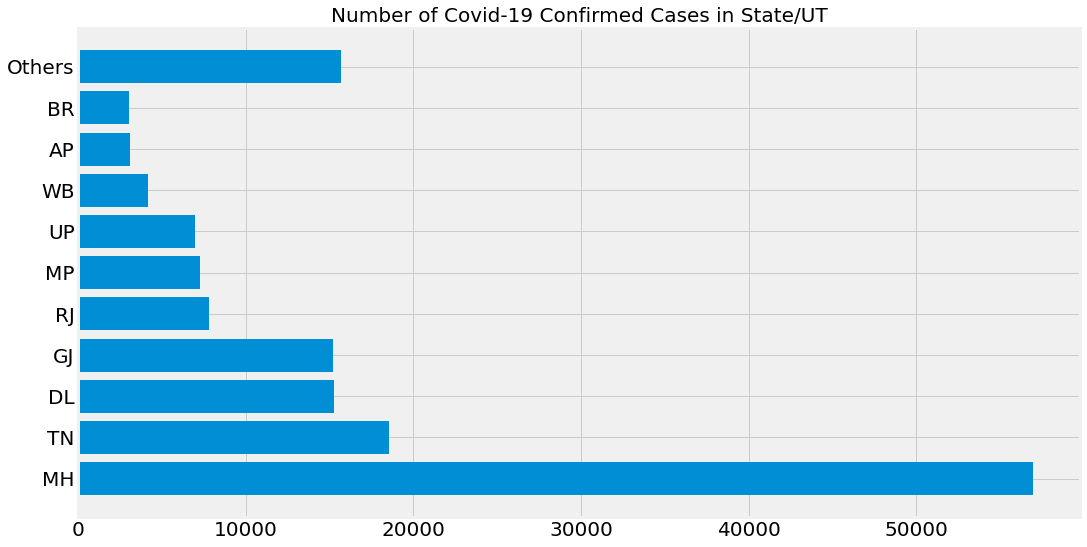

In [49]:
plot_bar_graphs(diff_unique_state, diff_confirmed_cases, 'Number of Covid-19 Confirmed Cases in State/UT')

In [50]:
def plot_pie_charts(x, y, title):
    c = random.choices(list(mcolors.CSS4_COLORS.values()),k = len(unique_state))
    plt.figure(figsize=(20,15))
    plt.title(title, size=20)
    plt.pie(y, colors=c)
    plt.legend(x, loc='best', fontsize=15)
    plt.show()

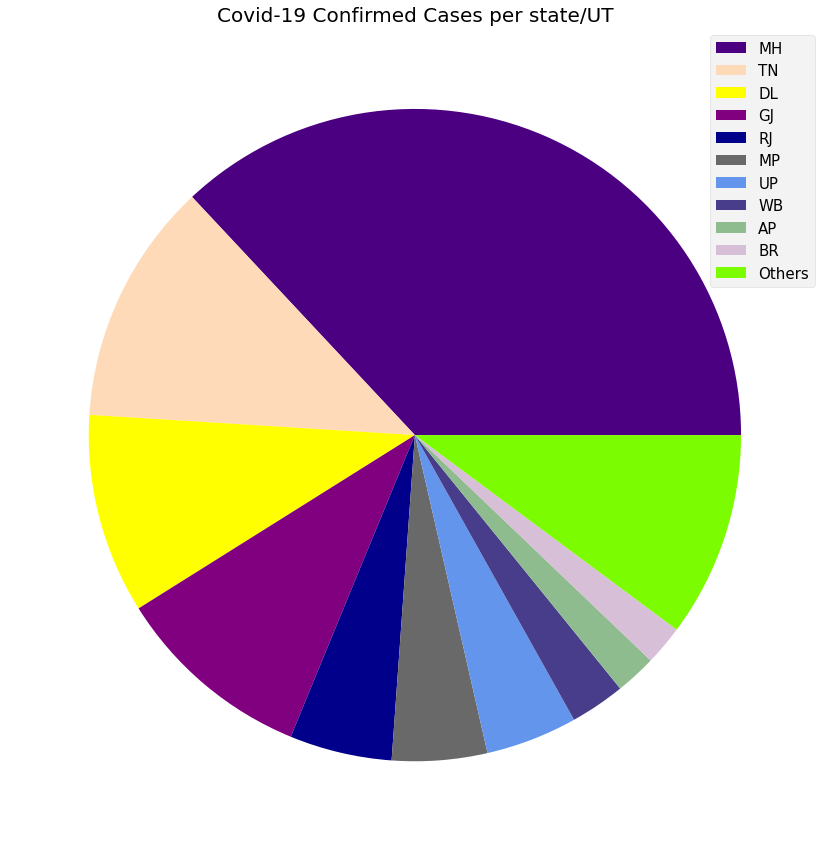

In [51]:
plot_pie_charts(diff_unique_state, diff_confirmed_cases, 'Covid-19 Confirmed Cases per state/UT')

In [59]:
days_since_3_14 = np.array([i for i in range(len(dates))]).reshape(-1, 1)
india_cases = np.array(india_cases).reshape(-1, 1)
total_deaths = np.array(total_deaths).reshape(-1, 1)
total_recovered = np.array(total_recovered).reshape(-1, 1)

In [60]:
days_in_future = 20
future_forecast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1, 1)
adjusted_dates = future_forecast[:-20]

In [61]:
future_forecast

array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19],
       [20],
       [21],
       [22],
       [23],
       [24],
       [25],
       [26],
       [27],
       [28],
       [29],
       [30],
       [31],
       [32],
       [33],
       [34],
       [35],
       [36],
       [37],
       [38],
       [39],
       [40],
       [41],
       [42],
       [43],
       [44],
       [45],
       [46],
       [47],
       [48],
       [49],
       [50],
       [51],
       [52],
       [53],
       [54],
       [55],
       [56],
       [57],
       [58],
       [59],
       [60],
       [61],
       [62],
       [63],
       [64],
       [65],
       [66],
       [67],
       [68],
       [69],
       [70],
       [71],
       [72],
       [73],
       [74],
       [75],
       [76],

In [62]:
start = '14/03/2020'
start_date = datetime.datetime.strptime(start, '%d/%m/%Y')
future_forecast_dates = []
for i in range(len(future_forecast)):
    future_forecast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%d/%m/%Y'))

In [64]:
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_3_14, india_cases, test_size=0.25, shuffle=False) 

In [65]:
# transform our data for polynomial regression
poly = PolynomialFeatures(degree=3)
poly_X_train_confirmed = poly.fit_transform(X_train_confirmed)
poly_X_test_confirmed = poly.fit_transform(X_test_confirmed)
poly_future_forecast = poly.fit_transform(future_forecast)

In [66]:
# polynomial regression
linear_model = LinearRegression(normalize=True, fit_intercept=False)
linear_model.fit(poly_X_train_confirmed, y_train_confirmed)
test_linear_pred = linear_model.predict(poly_X_test_confirmed)
linear_pred = linear_model.predict(poly_future_forecast)
print('MAE:', mean_absolute_error(test_linear_pred, y_test_confirmed))
print('MSE:',mean_squared_error(test_linear_pred, y_test_confirmed))

MAE: 5708.274507878586
MSE: 45462930.5774785


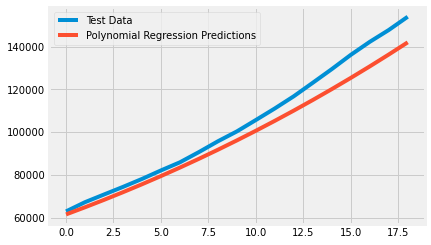

In [67]:
plt.plot(y_test_confirmed)
plt.plot(test_linear_pred)
plt.legend(['Test Data', 'Polynomial Regression Predictions'])

In [68]:
# svm_confirmed = svm_search.best_estimator_
svm_confirmed = SVR(shrinking=True, kernel='poly',gamma=0.01, epsilon=1,degree=5, C=0.1)
svm_confirmed.fit(X_train_confirmed, y_train_confirmed)
svm_pred = svm_confirmed.predict(future_forecast)

c:\users\91965\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


MAE: 55416.40198926923
MSE: 4331078929.247949


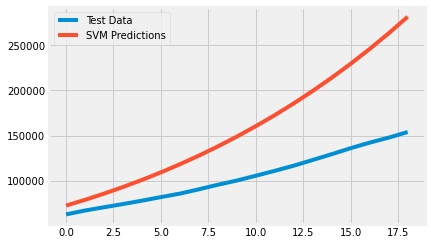

In [69]:
svm_test_pred = svm_confirmed.predict(X_test_confirmed)
plt.plot(y_test_confirmed)
plt.plot(svm_test_pred)
plt.legend(['Test Data', 'SVM Predictions'])
print('MAE:', mean_absolute_error(svm_test_pred, y_test_confirmed))
print('MSE:',mean_squared_error(svm_test_pred, y_test_confirmed))

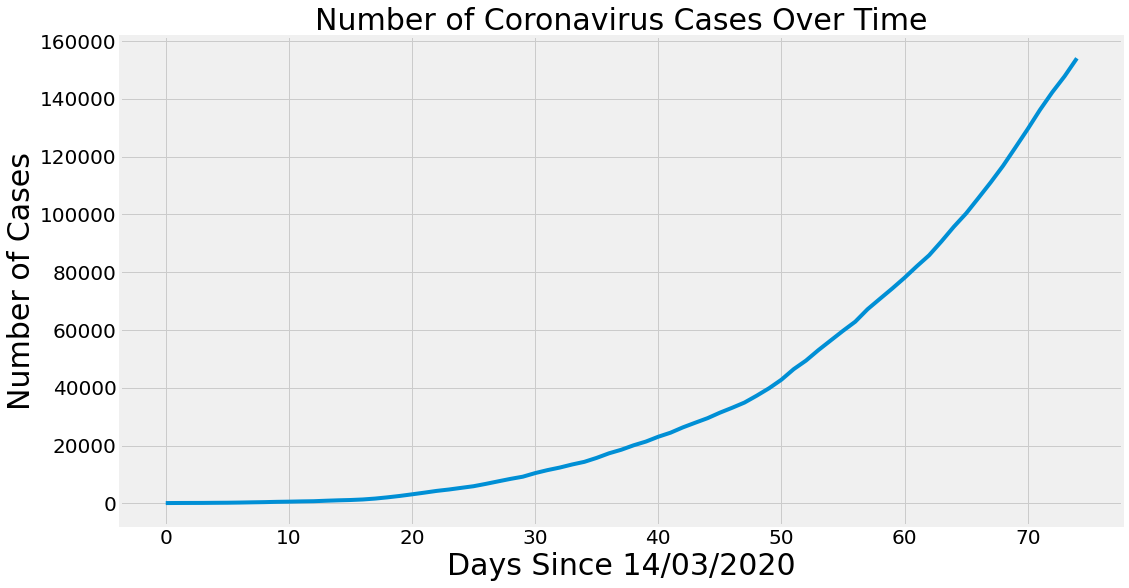

In [70]:
adjusted_dates = adjusted_dates.reshape(1, -1)[0]
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, india_cases)
plt.title('Number of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since 14/03/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

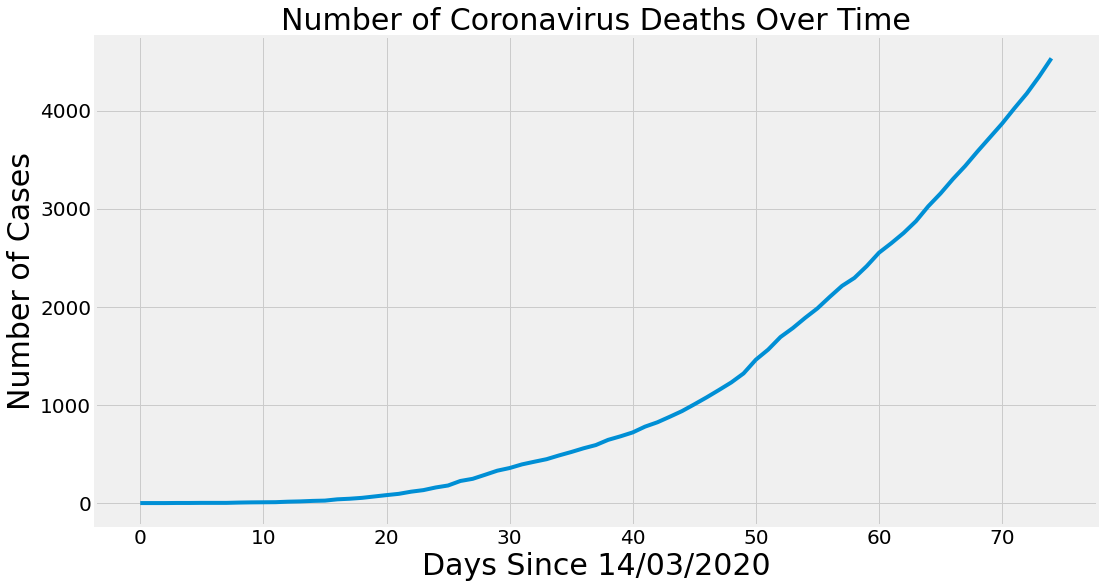

In [71]:
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, total_deaths)
plt.title('Number of Coronavirus Deaths Over Time', size=30)
plt.xlabel('Days Since 14/03/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

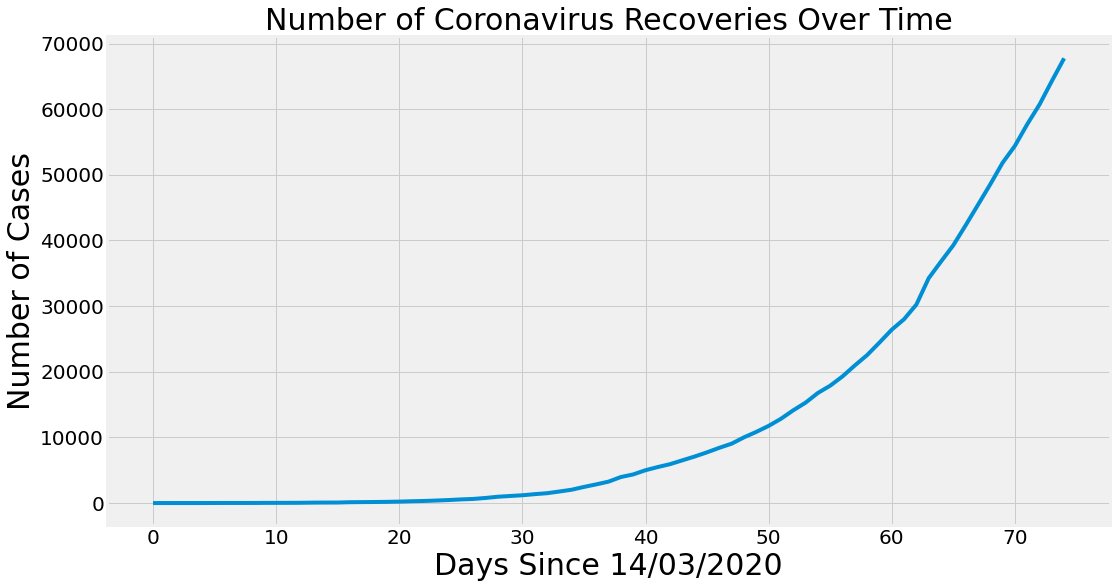

In [72]:
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, total_recovered)
plt.title('Number of Coronavirus Recoveries Over Time', size=30)
plt.xlabel('Days Since 14/03/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

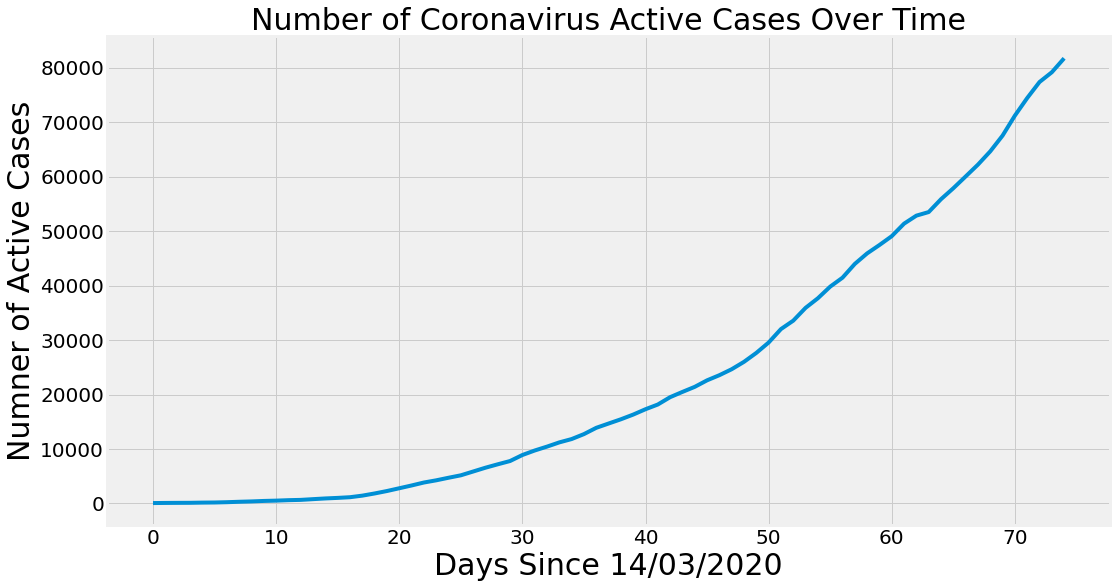

In [73]:
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, total_active)
plt.title('Number of Coronavirus Active Cases Over Time', size=30)
plt.xlabel('Days Since 14/03/2020', size=30)
plt.ylabel('Numner of Active Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

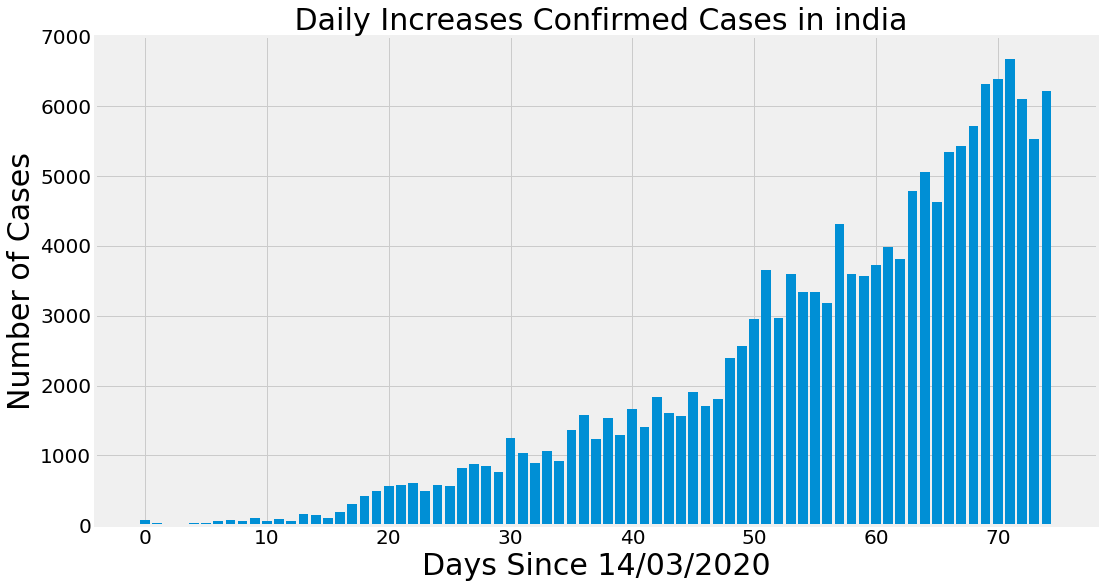

In [74]:
plt.figure(figsize=(16, 9))
plt.bar(adjusted_dates, india_daily_increase)
plt.title(' Daily Increases Confirmed Cases in india', size=30)
plt.xlabel('Days Since 14/03/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

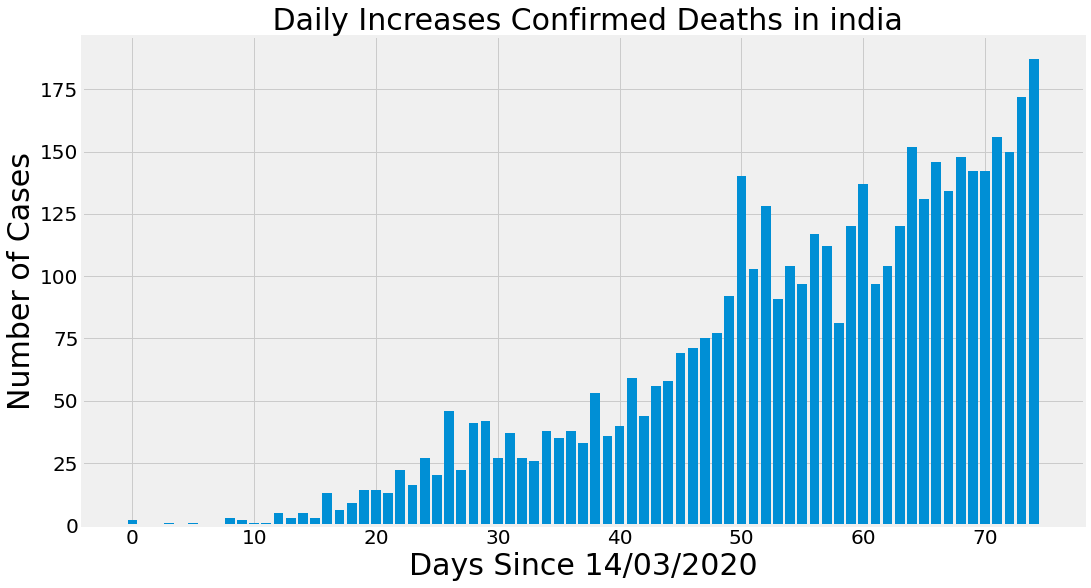

In [76]:
plt.figure(figsize=(16, 9))
plt.bar(adjusted_dates, india_daily_death)
plt.title(' Daily Increases Confirmed Deaths in india', size=30)
plt.xlabel('Days Since 14/03/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

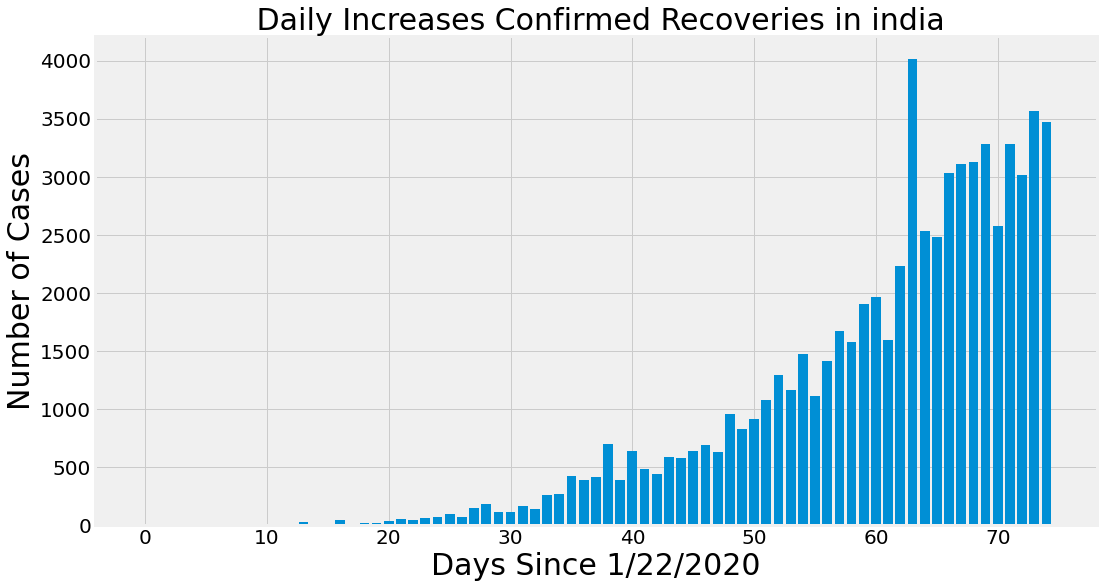

In [80]:
plt.figure(figsize=(16, 9))
plt.bar(adjusted_dates, india_daily_recoveries)
plt.title(' Daily Increases Confirmed Recoveries in india', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [81]:
def plot_predictions(x, y, pred, algo_name, color):
    plt.figure(figsize=(16, 9))
    plt.plot(x, y)
    plt.plot(future_forecast, pred, linestyle='dashed', color=color)
    plt.title('Number of Coronavirus Cases Over Time', size=30)
    plt.xlabel('Days Since 14/03/2020', size=30)
    plt.ylabel('Number of Cases', size=30)
    plt.legend(['Confirmed Cases', algo_name], prop={'size': 20})
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

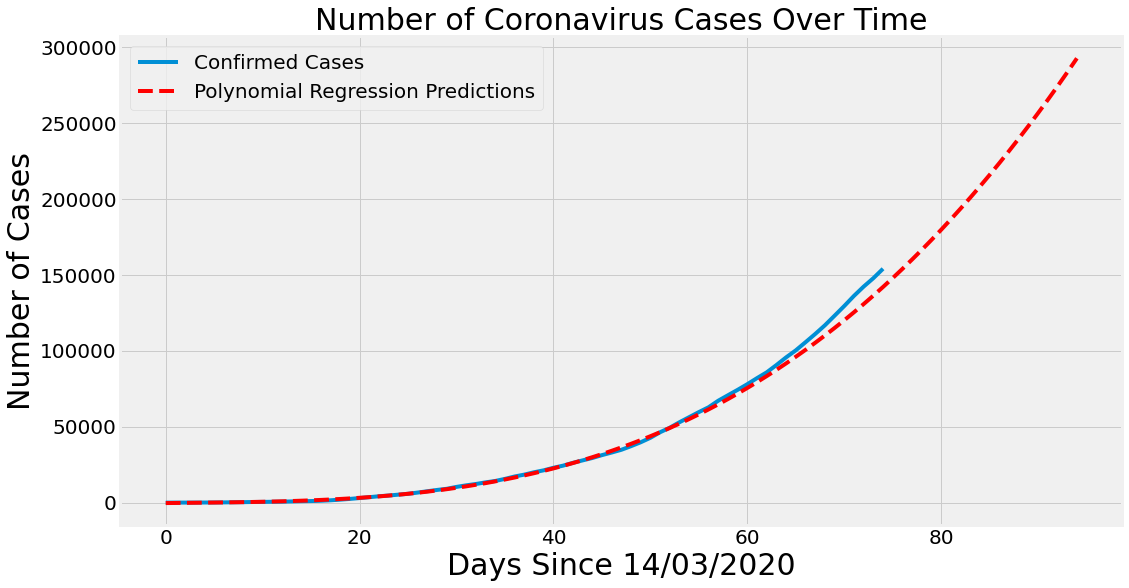

In [82]:
plot_predictions(adjusted_dates, india_cases, linear_pred, 'Polynomial Regression Predictions', 'red')

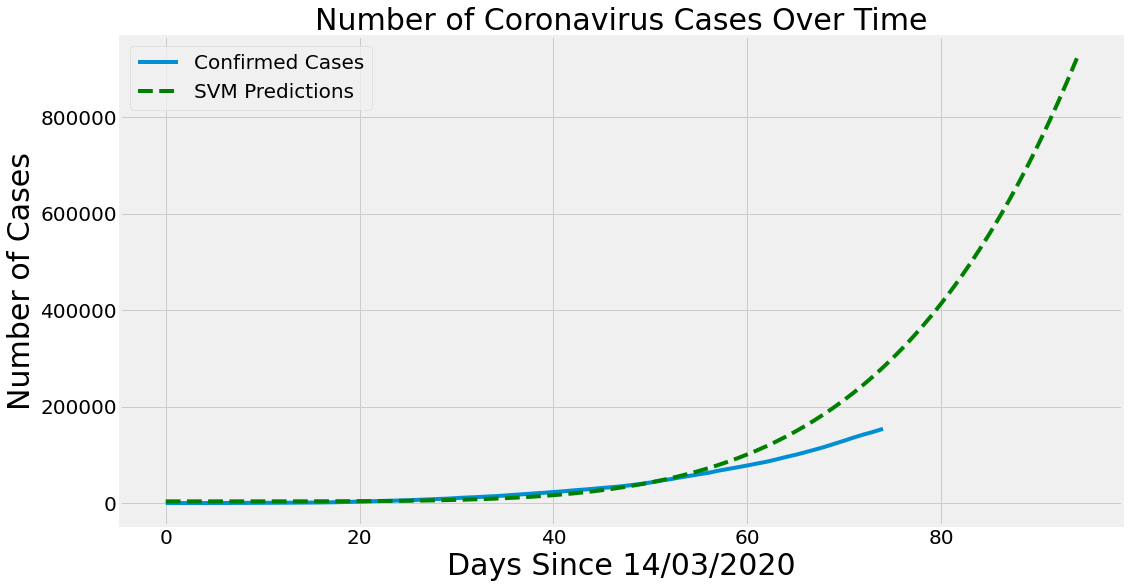

In [83]:
plot_predictions(adjusted_dates, india_cases, svm_pred, 'SVM Predictions', 'green')

In [84]:
# Future predictions using polynomial regression
linear_pred = linear_pred.reshape(1,-1)[0]
poly_df = pd.DataFrame({'Date': future_forecast_dates[-20:], 'Predicted number of Confirmed Cases in india': np.round(linear_pred[-20:])})
poly_df

,Date,Predicted number of Confirmed Cases in india
0,28/05/2020,147910.0
1,29/05/2020,153940.0
2,30/05/2020,160134.0
3,31/05/2020,166493.0
4,01/06/2020,173019.0
5,02/06/2020,179716.0
6,03/06/2020,186585.0
7,04/06/2020,193628.0
8,05/06/2020,200848.0
9,06/06/2020,208246.0


In [85]:
# Future predictions using SVM 
svm_df = pd.DataFrame({'Date': future_forecast_dates[-20:], 'SVM Predicted # of Confirmed Cases in india': np.round(svm_pred[-20:])})
svm_df

,Date,SVM Predicted # of Confirmed Cases in india
0,28/05/2020,300804.0
1,29/05/2020,321150.0
2,30/05/2020,342596.0
3,31/05/2020,365185.0
4,01/06/2020,388963.0
5,02/06/2020,413975.0
6,03/06/2020,440270.0
7,04/06/2020,467896.0
8,05/06/2020,496903.0
9,06/06/2020,527342.0


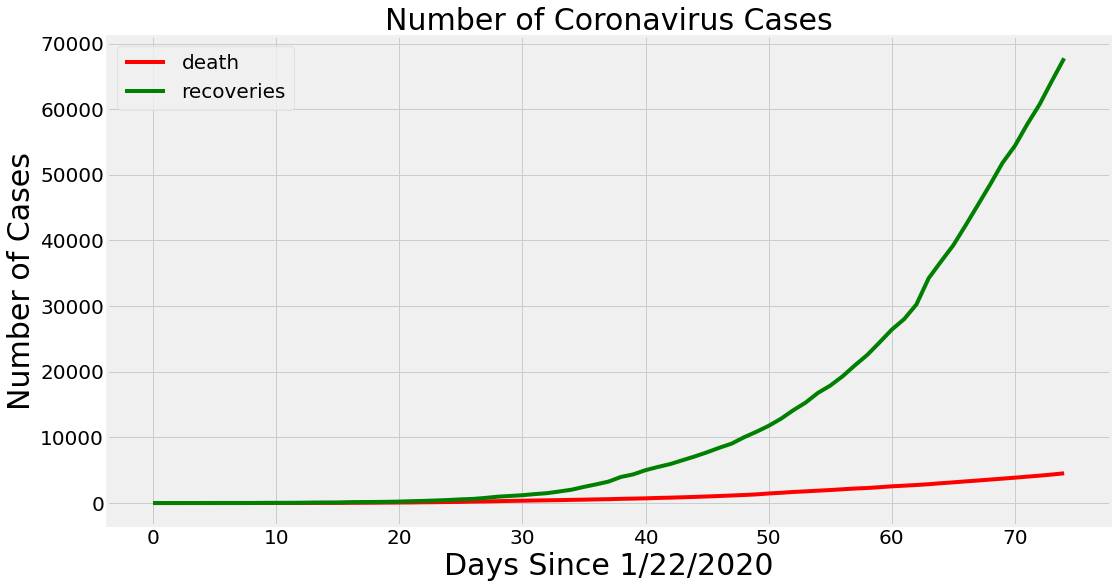

In [86]:
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, total_deaths, color='r')
plt.plot(adjusted_dates, total_recovered, color='green')
plt.legend(['death', 'recoveries'], loc='best', fontsize=20)
plt.title('Number of Coronavirus Cases', size=30)
plt.xlabel('Days Since 14/03/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

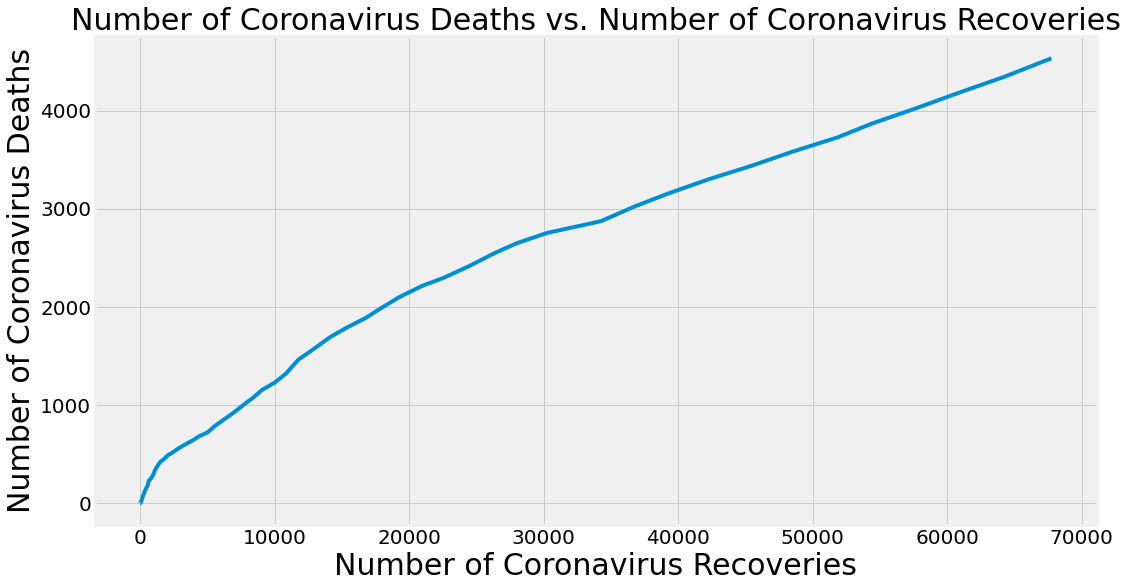

In [87]:
plt.figure(figsize=(16, 9))
plt.plot(total_recovered, total_deaths)
plt.title('Number of Coronavirus Deaths vs. Number of Coronavirus Recoveries', size=30)
plt.xlabel('Number of Coronavirus Recoveries', size=30)
plt.ylabel('Number of Coronavirus Deaths', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [88]:
def state_plot(x, y1, y2, y3, y4, state):
    plt.figure(figsize=(16, 9))
    plt.plot(x, y1)
    plt.title('{} Confirmed Cases'.format(state), size=30)
    plt.xlabel('Days Since 14/03/2020', size=30)
    plt.ylabel('Number of Cases', size=30)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

    plt.figure(figsize=(16, 9))
    plt.bar(x, y2)
    plt.title('{} Daily Increases in Confirmed Cases'.format(state), size=30)
    plt.xlabel('Days Since 14/03/2020', size=30)
    plt.ylabel('Number of Cases', size=30)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

    plt.figure(figsize=(16, 9))
    plt.bar(x, y3)
    plt.title('{} Daily Increases in Deaths'.format(state), size=30)
    plt.xlabel('Days Since 14/03/2020', size=30)
    plt.ylabel('Number of Cases', size=30)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

    plt.figure(figsize=(16, 9))
    plt.bar(x, y4)
    plt.title('{} Daily Increases in Recoveries'.format(state), size=30)
    plt.xlabel('Days Since 14/03/2020', size=30)
    plt.ylabel('Number of Cases', size=30)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

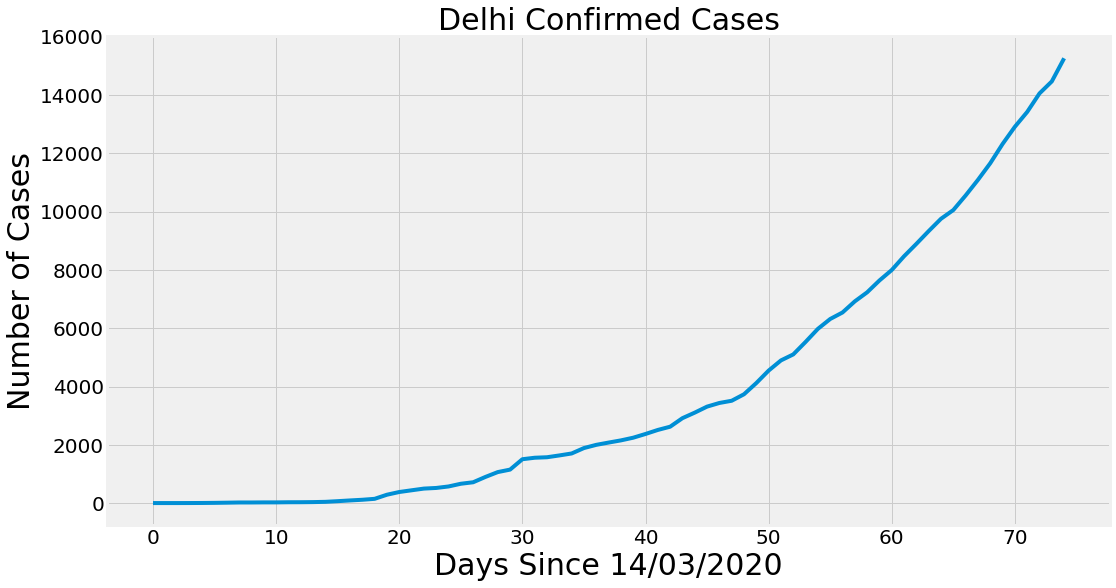

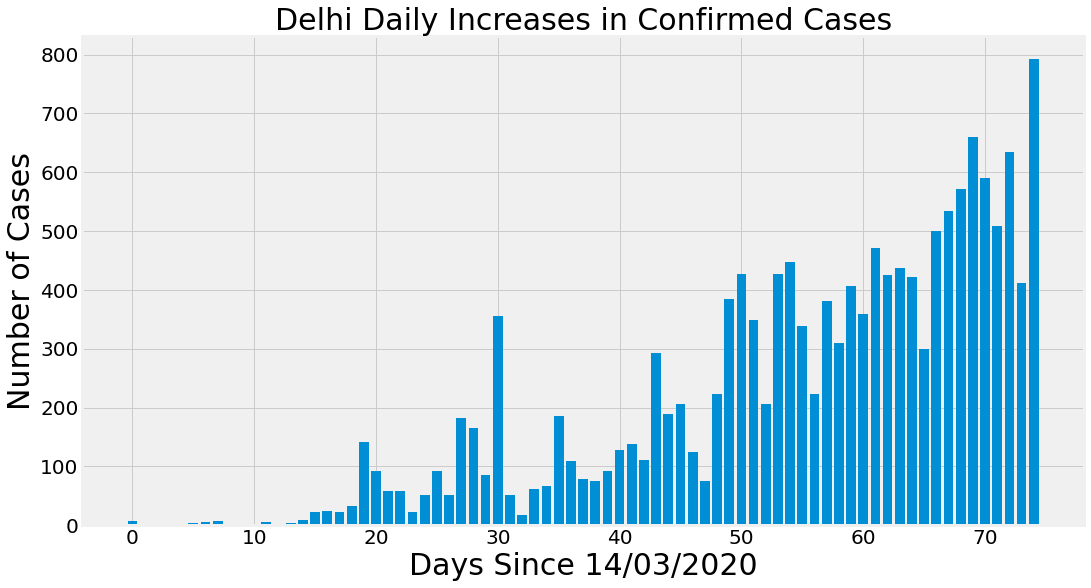

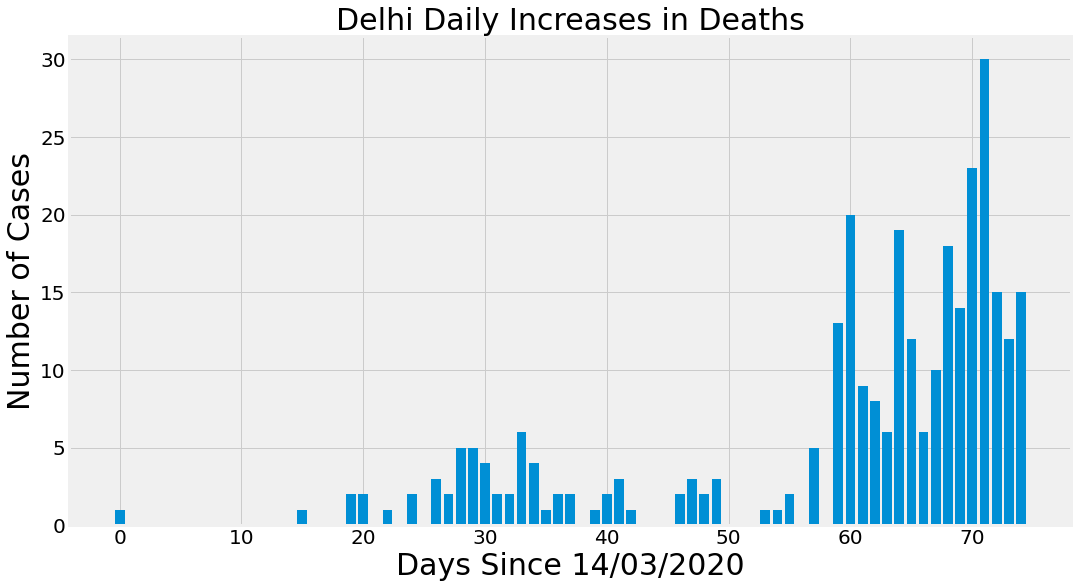

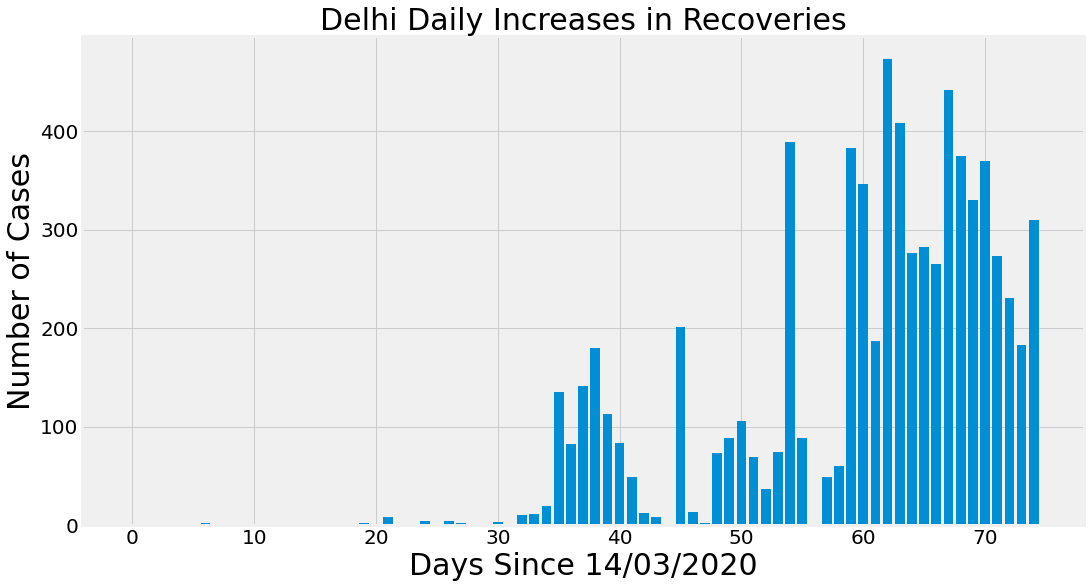

In [91]:
state_plot(adjusted_dates, Delhi_cases, Delhi_daily_increase, Delhi_daily_death, Delhi_daily_recoveries, 'Delhi')

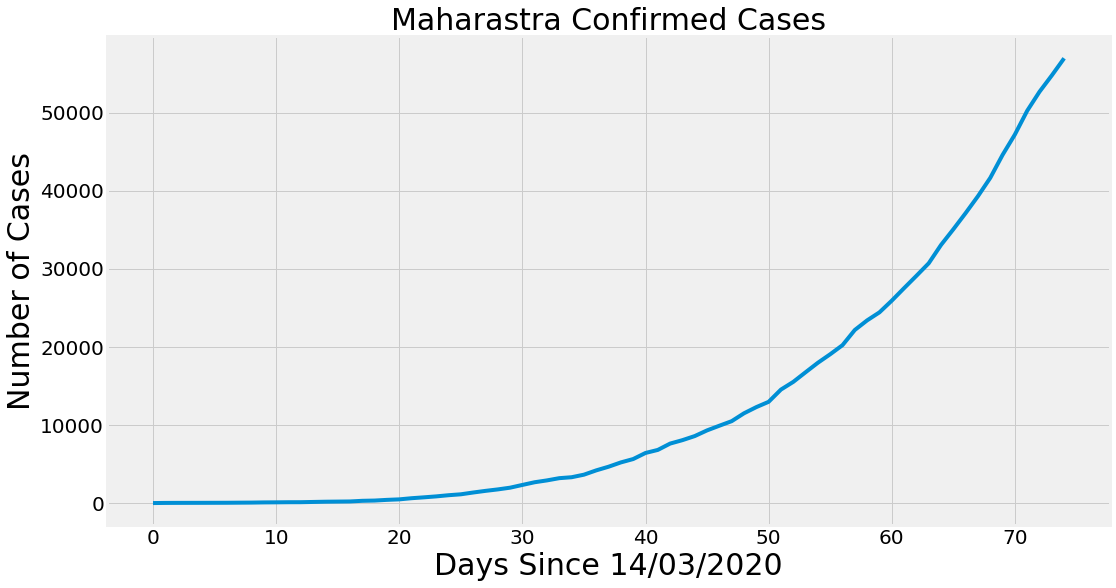

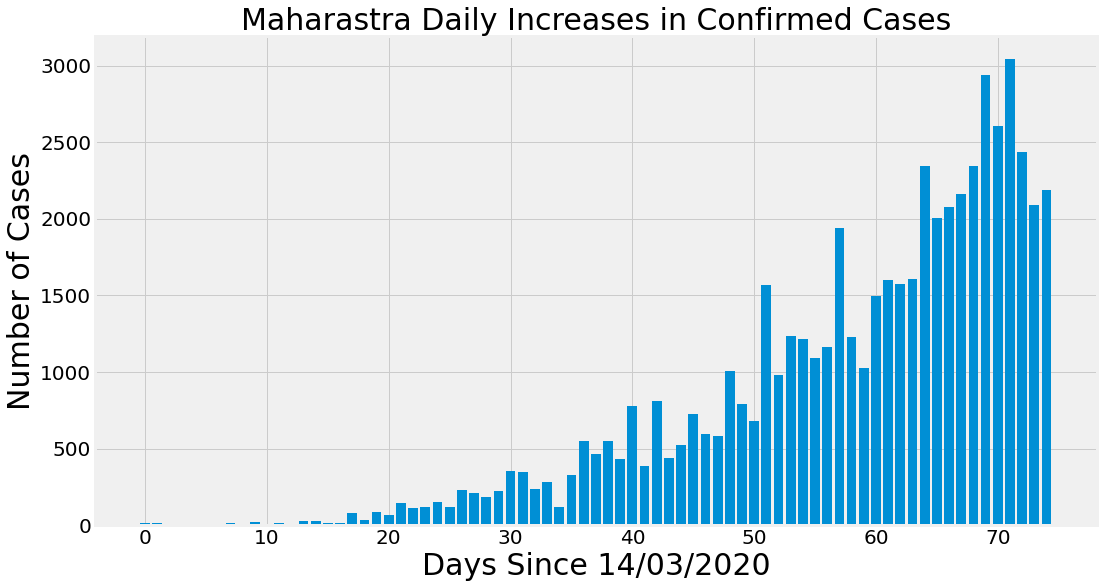

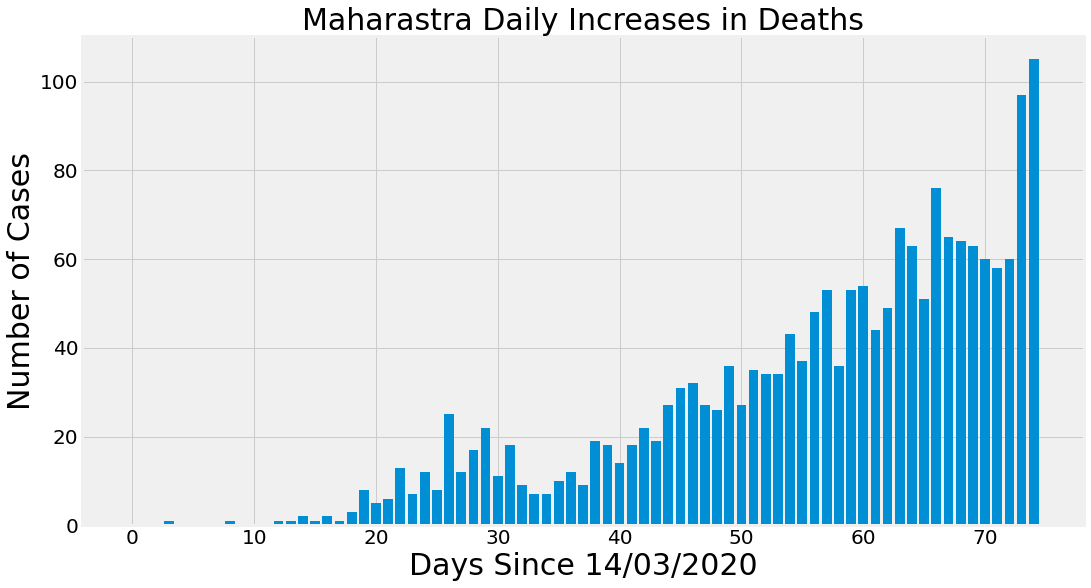

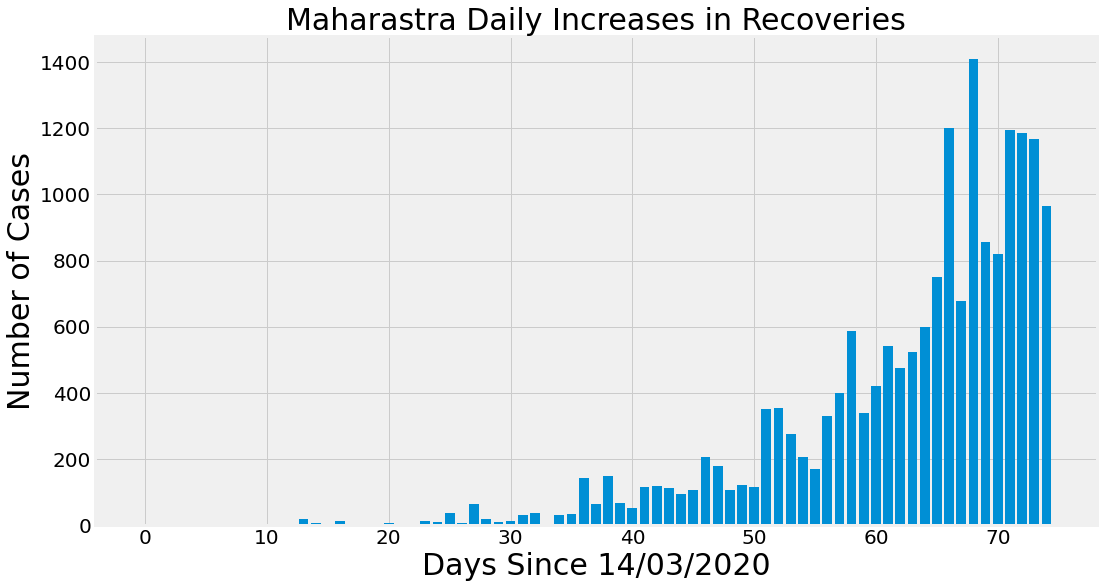

In [93]:
state_plot(adjusted_dates, Maharastra_cases, Maharastra_daily_increase, Maharastra_daily_death, Maharastra_daily_recoveries, 'Maharastra')

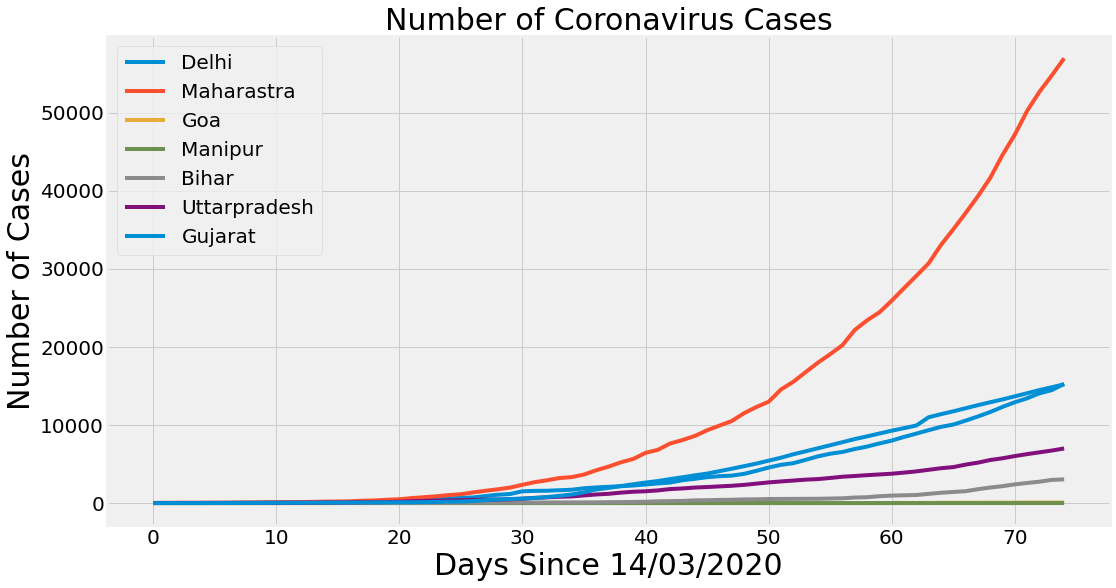

In [95]:
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, Delhi_cases)
plt.plot(adjusted_dates, Maharastra_cases)
plt.plot(adjusted_dates, Goa_cases)
plt.plot(adjusted_dates, Manipur_cases)
plt.plot(adjusted_dates, Bihar_cases)
plt.plot(adjusted_dates, Uttarpradesh_cases)
plt.plot(adjusted_dates, Gujarat_cases)
plt.title('Number of Coronavirus Cases', size=30)
plt.xlabel('Days Since 14/03/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.legend(['Delhi', 'Maharastra', 'Goa', 'Manipur', 'Bihar', 'Uttarpradesh', 'Gujarat'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

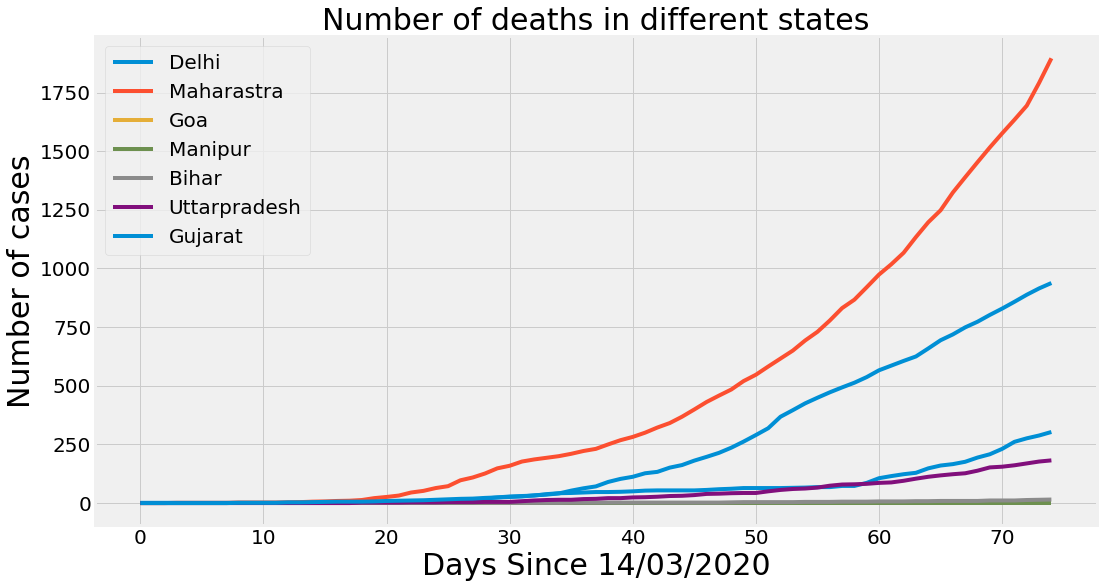

In [100]:
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, Delhi_deaths)
plt.plot(adjusted_dates, Maharastra_deaths)
plt.plot(adjusted_dates, Goa_deaths)
plt.plot(adjusted_dates, Manipur_deaths)
plt.plot(adjusted_dates, Bihar_deaths)
plt.plot(adjusted_dates, Uttarpradesh_deaths)
plt.plot(adjusted_dates, Gujarat_deaths)
plt.title('Number of deaths in different states', size=30)
plt.xlabel('Days Since 14/03/2020', size=30)
plt.ylabel('Number of cases', size=30)
plt.legend(['Delhi', 'Maharastra', 'Goa', 'Manipur', 'Bihar', 'Uttarpradesh', 'Gujarat'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

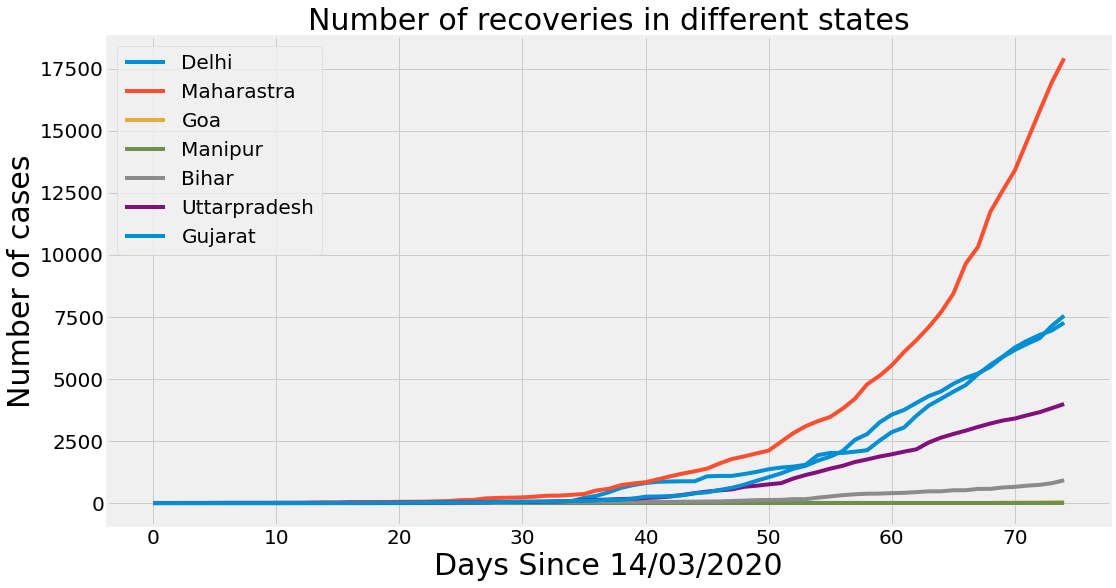

In [101]:
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, Delhi_recoveries)
plt.plot(adjusted_dates, Maharastra_recoveries)
plt.plot(adjusted_dates, Goa_recoveries)
plt.plot(adjusted_dates, Manipur_recoveries)
plt.plot(adjusted_dates, Bihar_recoveries)
plt.plot(adjusted_dates, Uttarpradesh_recoveries)
plt.plot(adjusted_dates, Gujarat_recoveries)
plt.title('Number of recoveries in different states', size=30)
plt.xlabel('Days Since 14/03/2020', size=30)
plt.ylabel('Number of cases', size=30)
plt.legend(['Delhi', 'Maharastra', 'Goa', 'Manipur', 'Bihar', 'Uttarpradesh', 'Gujarat'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()